# TP BE Météo

## Chargement des librairies

cf readme

In [1]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")
library(dplyr)
library(glue)
library(tidyr)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Chargement des données

In [2]:
# données complètes
data_full_dir = "../data/donnees-synop-essentielles-omm.csv"
# 31s à s'exécuter sur Stuart

# extract aléatoire des données
data_ext10_dir = "../data/donnees_extracted_10.csv"
# extract aléatoire des données en métropole seulement
data_ext10_met_dir = "../data/donnees_extracted_metro_10.csv"
# 9s à s'exécuter sur stuart


full_data <- read.csv(data_full_dir, 
            sep=";",                        # à toggle en fonction du fichier
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE)

## Affichage synthétique des données chargées

In [3]:
summary(full_data)
# RQE : le read_csv remplace les ' ' par des '.' dans les titres des colonnes

# affiche toutes les colonnes
colnames(full_data)

# affiche les numéros de stations présentes dans le fichier
stations_in_file = unique(unlist(full_data["ID.OMM.station"]))
print(stations_in_file)

 ID.OMM.station                         Date         Pression.au.niveau.mer
 Min.   : 7005   2017-08-31T20:00:00+02:00:     62   Min.   : 93850        
 1st Qu.: 7207   2019-01-08T13:00:00+01:00:     62   1st Qu.:101180        
 Median : 7577   2019-01-24T16:00:00+01:00:     62   Median :101600        
 Mean   :26062   2019-01-26T04:00:00+01:00:     62   Mean   :101577        
 3rd Qu.:61976   2023-01-06T13:00:00+01:00:     62   3rd Qu.:102090        
 Max.   :89642   2023-01-06T16:00:00+01:00:     62   Max.   :107570        
                 (Other)                  :1719195   NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.0                 
 1st Qu.:  -60.00                  1st Qu.: 2.0                 
 Median :   10.00                  Median : 3.0                 
 Mean   :   15.39                  Mean   : 4.3                 
 3rd Qu.:   90.00                  3rd Qu.: 7.0                 
 M

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

 [1]  7181 81405  7627 78894  7020  7280  7015  7110 81408  7222  7240  7747
[13]  7027  7790 78925  7510  7761 61976  7149  7072  7130  7190 61980  7005
[25]  7607  7650  7207  7335  7168  7643 78897  7535  7139  7690 78922 61998
[37] 89642  7471  7591 81415  7481  7558  7630 81401  7661  7577  7314  7037
[49] 61996  7434 61968 61972  7621  7460  7117 71805 61997 67005  7299  7255
[61] 78890 61970


## Compte les NaN dans par lignes et station

In [4]:
# Pour avoir le nombre de NaN
# result <- full_data %>%
#   group_by(ID.OMM.station) %>%
#   summarise(across(everything(), ~ sum(is.na(.x))))



# pour avoir le %age
result <- full_data %>%
  group_by(ID.OMM.station) %>%
  summarise(across(everything(), ~ {
    n_total <- n()
    n_na <- sum(is.na(.x))
    ifelse(n_total == 0, NA, n_na / n_total * 100)
  }))
print(result)


# adapte les dimensions
result_long <- result %>%
  pivot_longer(
    cols = -ID.OMM.station,
    names_to = "column",
    values_to = "na_count"
  )

# A tibble: 62 × 82
   ID.OMM.station  Date Pression.au.niveau.mer Variation.de.pression.en.3.heures
            <int> <dbl>                  <dbl>                             <dbl>
 1           7005     0                0.0411                             0.0548
 2           7015     0                0.00681                            0.0272
 3           7020     0                2.96                               0.114 
 4           7027     0                0.0205                             0.0240
 5           7037     0                0.436                              0.129 
 6           7072     0                0.0647                             0.0238
 7           7110     0                0.126                              0.0784
 8           7117     0                0.172                              0.213 
 9           7130     0                0.0749                             0.102 
10           7139     0                0.956                              1.01  
# ℹ 52 m

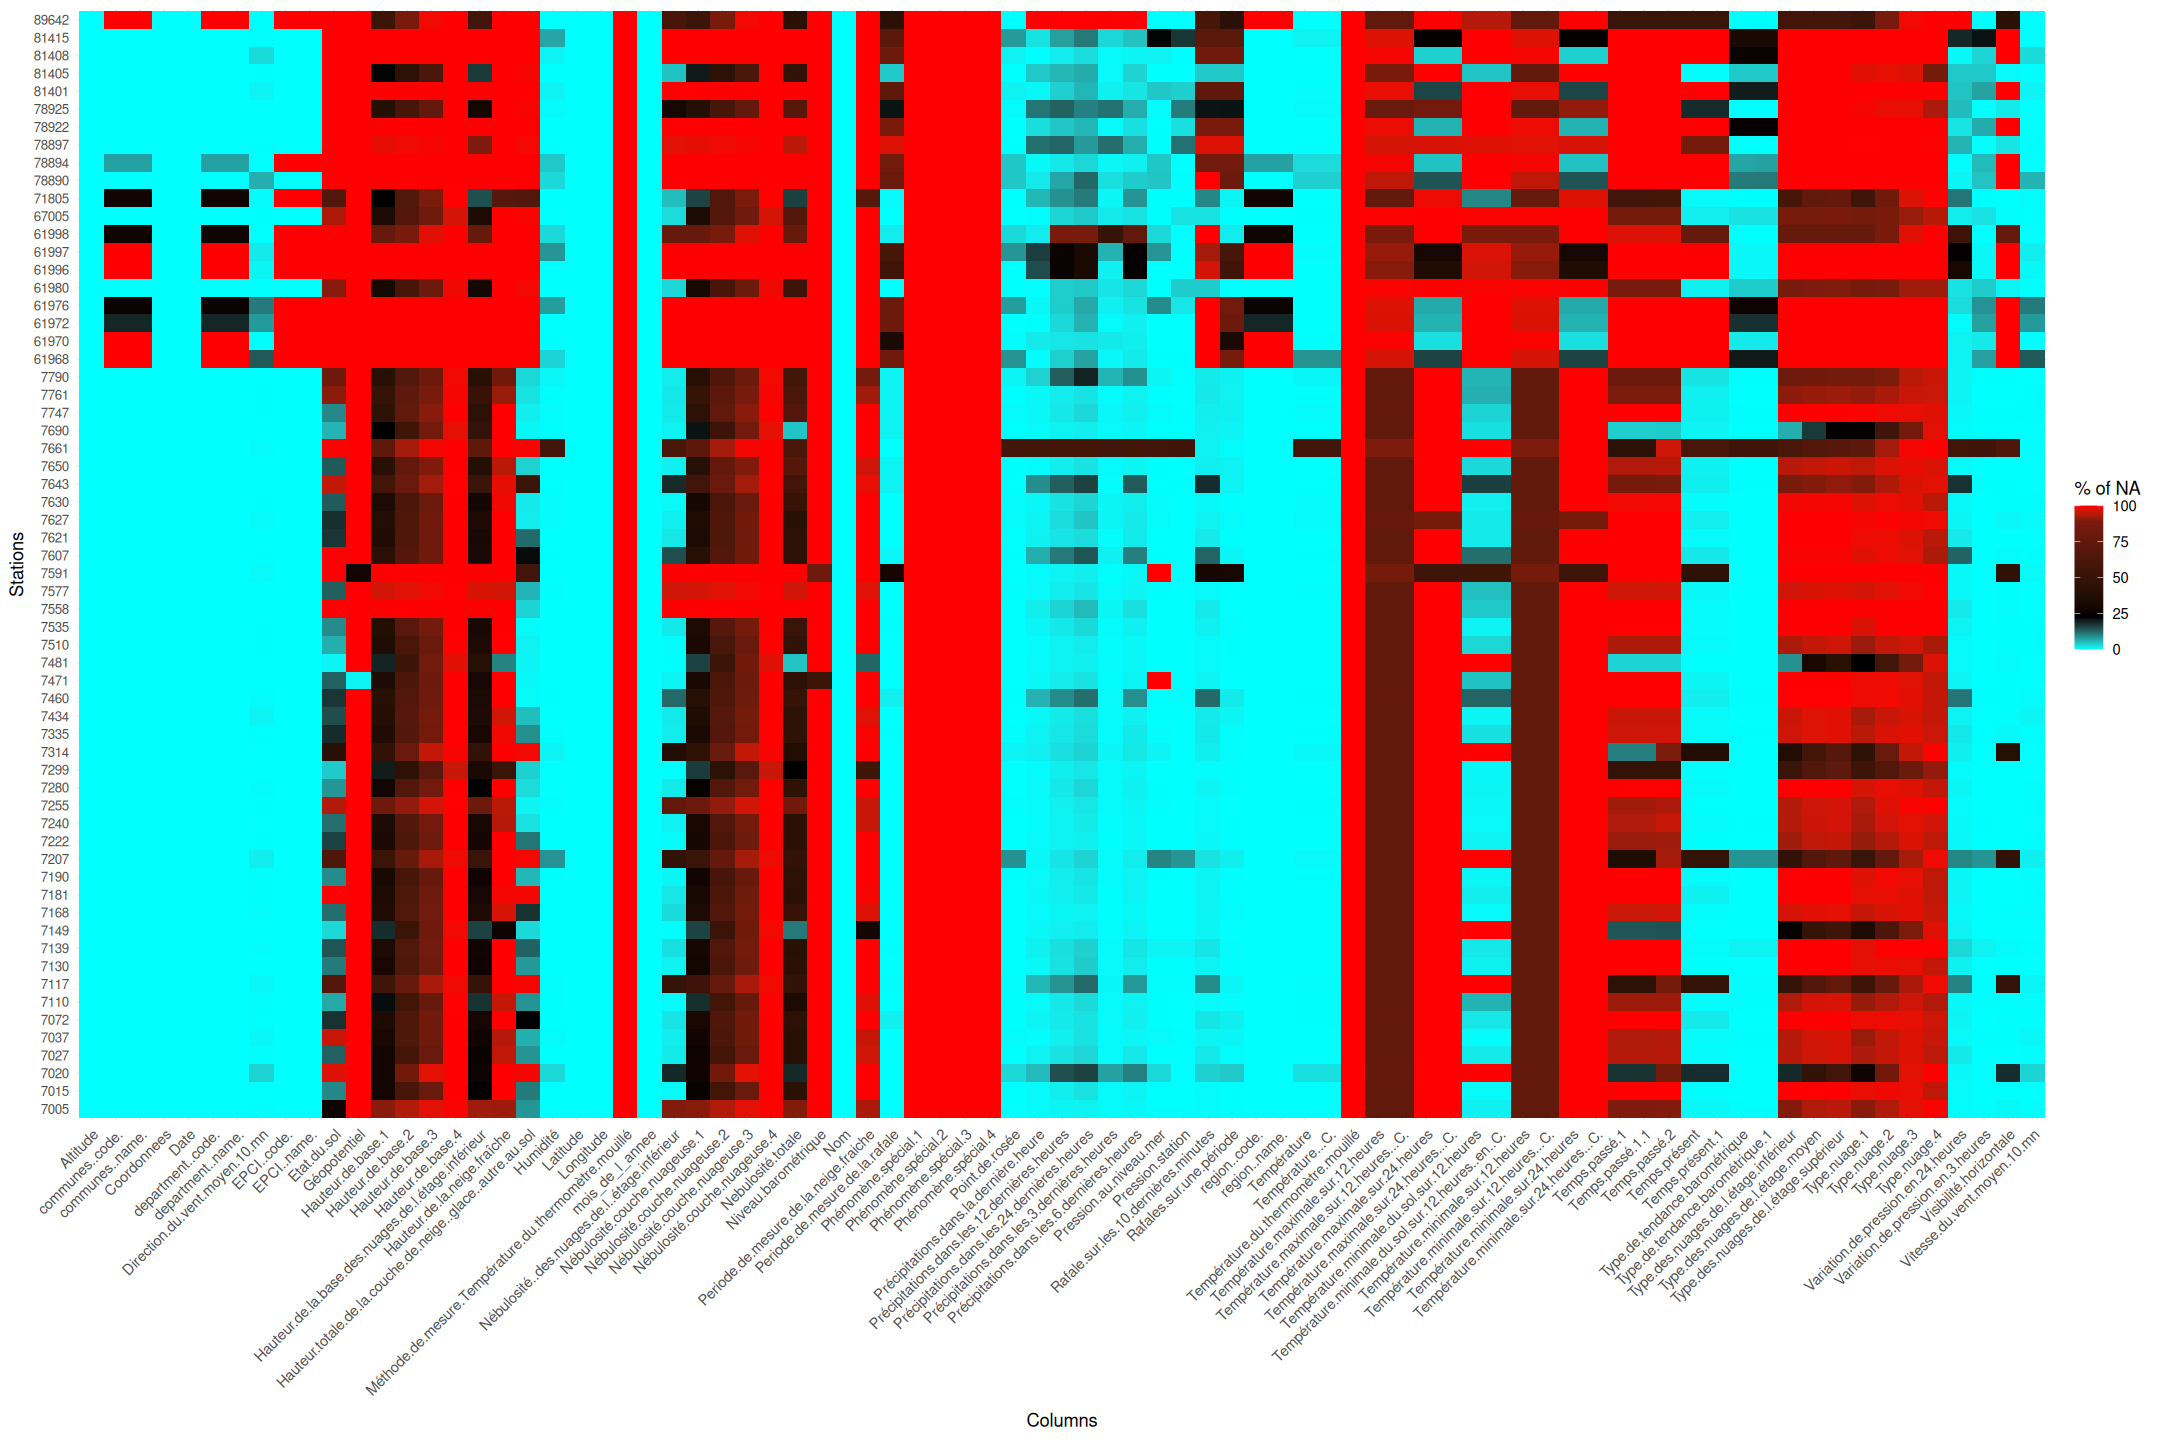

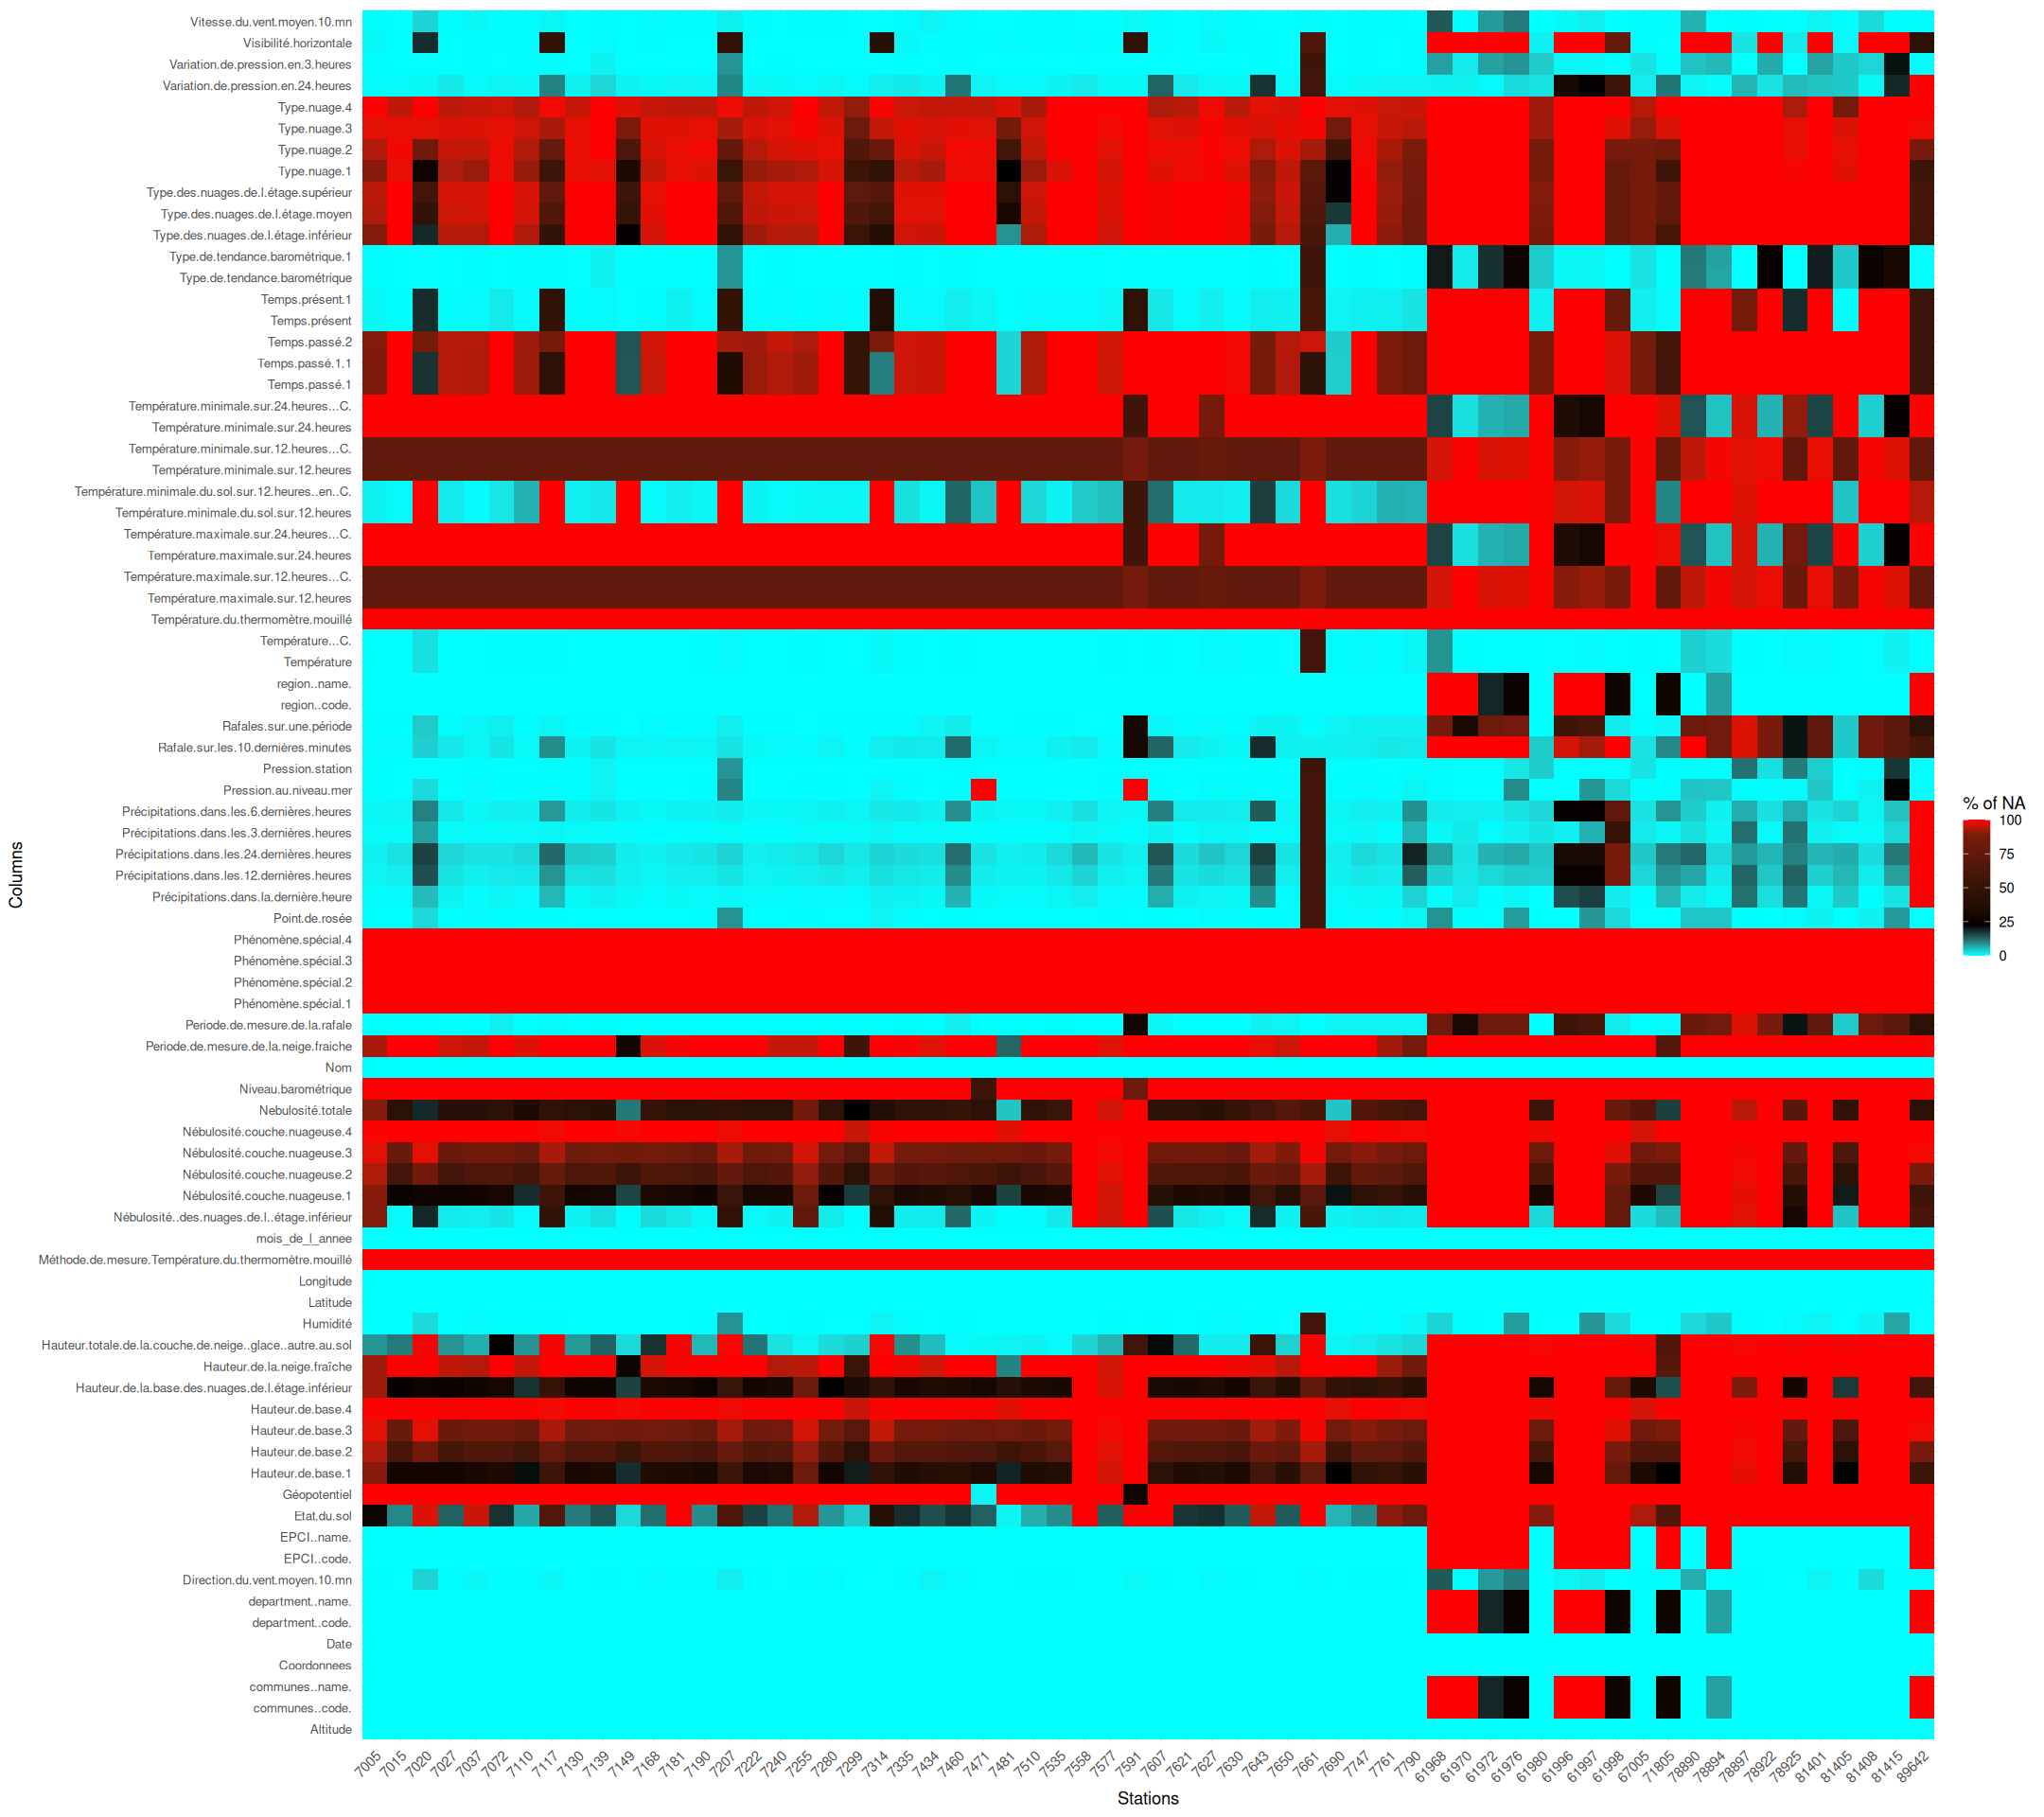

In [21]:
# Heatmap
options(repr.plot.width=18, repr.plot.height=12)
ggplot(result_long, aes(x = column, y = factor(ID.OMM.station), fill = na_count)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("cyan", "black", "red"),
                       values = scales::rescale(c(0, 0.1, 0.2, 0.8, 0.9))) +
  labs(x = "Columns", y = "Stations", fill = "% of NA") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),
        axis.text.x = element_text(angle = 45, hjust = 1))

# Heatmap Transposed
options(repr.plot.width=18, repr.plot.height=16)
ggplot(result_long, aes(x = factor(ID.OMM.station), y = column, fill = na_count)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("cyan", "black", "red"),
                       values = scales::rescale(c(0, 0.1, 0.2, 0.8, 0.9))) +
  labs(x = "Stations", y = "Columns", fill = "% of NA") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),
        axis.text.x = element_text(angle = 45, hjust = 1))
  ggsave("heatmapT.png", width = 25, height = 15, dpi = 300)

options(repr.plot.width=18, repr.plot.height=12)


## Liste toute les valeurs possibles d'une colonne

In [6]:
list_all_values <- function(data, column){
    all_values = unique(unlist(data[column]))
    colname = gsub("[[:punct:]]", " ", column)
    print(glue("All values found in column  '{colname}' : "))
    for(v in all_values){
        print(v)
    }
}

list_all_values(full_data, "communes..name.")

All values found in column  'communes  name ' : 
[1] "Thuilley-aux-Groseilles"
[1] "Matoury"
[1] "Lorp-Sentaraille"
[1] NA
[1] "La Hague"
[1] "Ouges"
[1] "Fretin"
[1] "Guipavas"
[1] "Saint-Georges"
[1] "Saint-Aignan-Grandlieu"
[1] "Parçay-Meslay"
[1] "Perpignan"
[1] "Carpiquet"
[1] "Lucciana"
[1] "Le Lamentin"
[1] "Mérignac"
[1] "Ajaccio"
[1] "Athis-Mons"
[1] "Prunay"
[1] "Saint-Jacques-de-la-Lande"
[1] "Holtzheim"
[1] "Sainte-Marie"
[1] "Abbeville"
[1] "Mont-de-Marsan"
[1] "Marignane"
[1] "Bangor"
[1] "Poitiers"
[1] "Barberey-Saint-Sulpice"
[1] "Mauguio"
[1] "Les Abymes"
[1] "Gourdon"
[1] "Cerisé"
[1] "Nice"
[1] "La Trinité"
[1] "Chaspuzac"
[1] "Embrun"
[1] "Maripasoula"
[1] "Colombier-Saugnieu"
[1] "Millau"
[1] "Blagnac"
[1] "Saint-Laurent-du-Maroni"
[1] "Saint-Mandrier-sur-Mer"
[1] "Montélimar"
[1] "Saint-Denis-d'Oléron"
[1] "Boos"
[1] "Limoges"
[1] "Louey"
[1] "Clermont-Ferrand"
[1] "Perros-Guirec"
[1] "Pamandzi"
[1] "Blotzheim"
[1] "Bourges"
[1] "La Désirade"
[1] "les Éparses de l

## Affiche un histogramme des valeurs d'une colonne

Warning message:
“Removed 68236 rows containing non-finite outside the scale range
(`stat_count()`).”


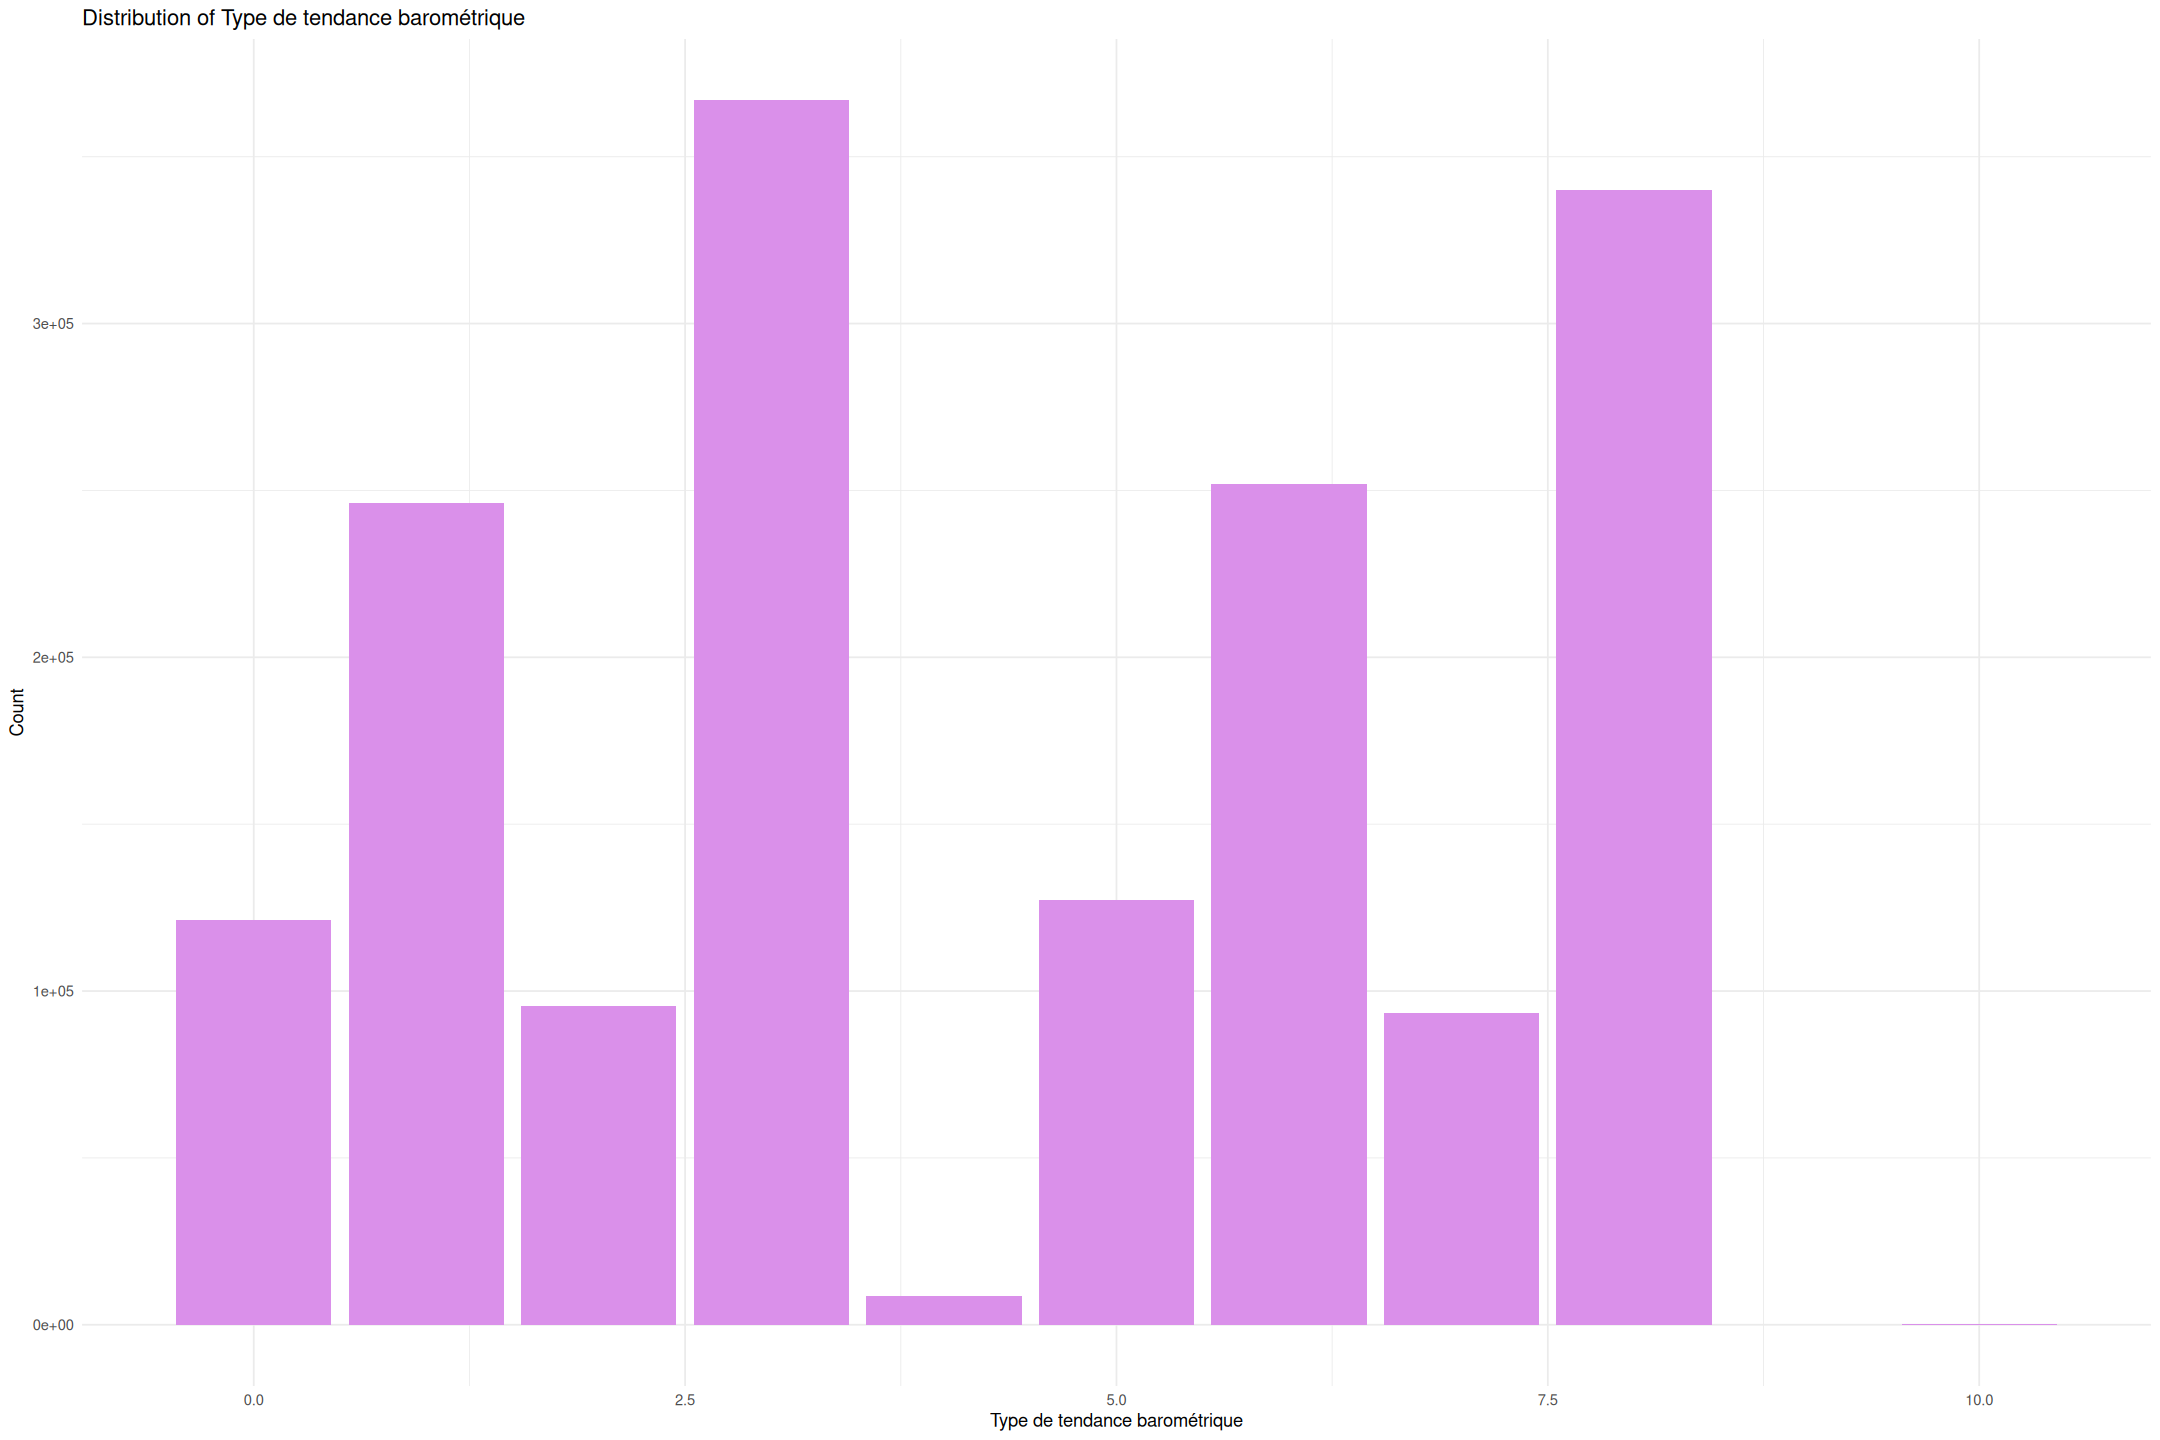

In [7]:
plot_name_distribution <- function(data, column_name) {
  stripped_column = gsub("[[:punct:]]", " ", column_name)
  titlec = paste("Distribution of", stripped_column)

  ggplot(data, aes(x = .data[[column_name]])) +
    geom_bar(fill = "#DA90EA") +
    labs(title = titlec,
         x = stripped_column,
         y = "Count") +
    theme_minimal()
}

plot_name_distribution(full_data, "Type.de.tendance.barométrique")


## Charge le fichier listant toutes les stations 

Fichier généré par CR.ipynb

In [8]:
# hardcoded directories
data_dir <- "../data/"
mesures_dir <-  paste(data_dir, "mesures/", sep="")
stations_csv <- paste(data_dir, "stations.csv", sep="")

stations_df <- read.csv(stations_csv, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=FALSE)

colnames(stations_df)

[1] "ID.OMM.station"    "Nom"               "Coordonnees"      
 [4] "Latitude"          "Longitude"         "Altitude"         
 [7] "communes..name."   "communes..code."   "EPCI..name."      
[10] "EPCI..code."       "department..name." "department..code."
[13] "region..name."     "region..code."

## Répartition des stations sur une carte du monde

[1] "sf"         "data.frame"

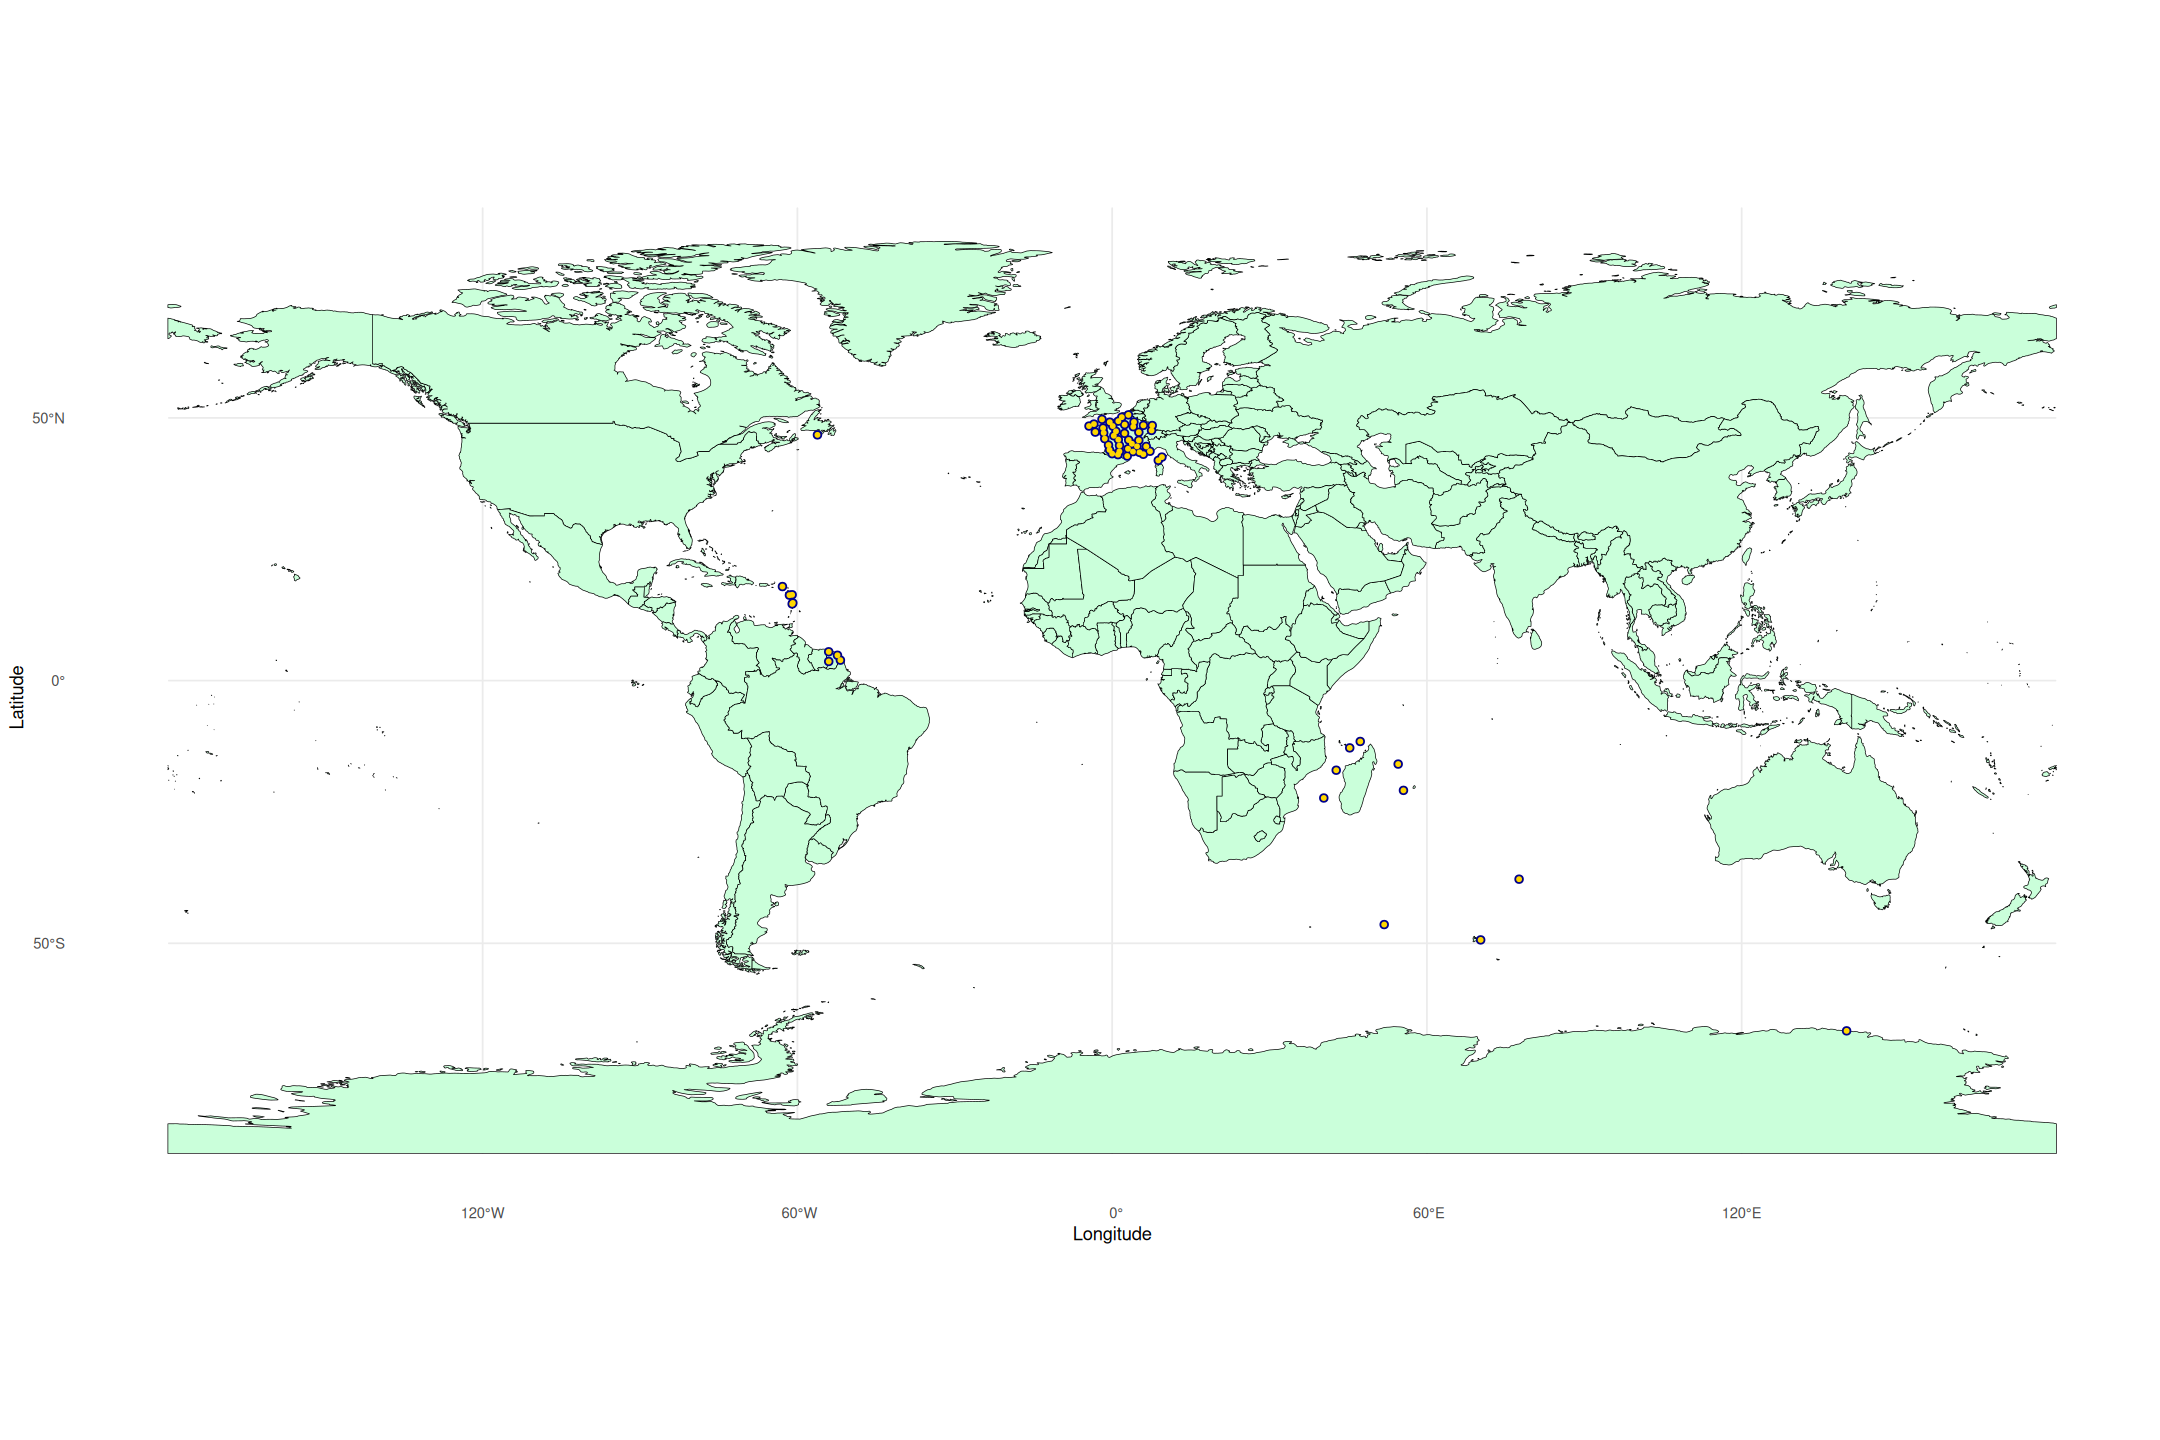

In [9]:

worldmap <- ne_countries(scale = 'medium', type = 'map_units',
                         returnclass = 'sf')
class(worldmap)

# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.
ggplot() +
  geom_sf(data = worldmap, color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df, aes(x = Longitude, y = Latitude), color = "darkblue", size = 2) +
  geom_point(data = stations_df[stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  theme_minimal()

## Répartition des stations sur une carte de France métropolitaine

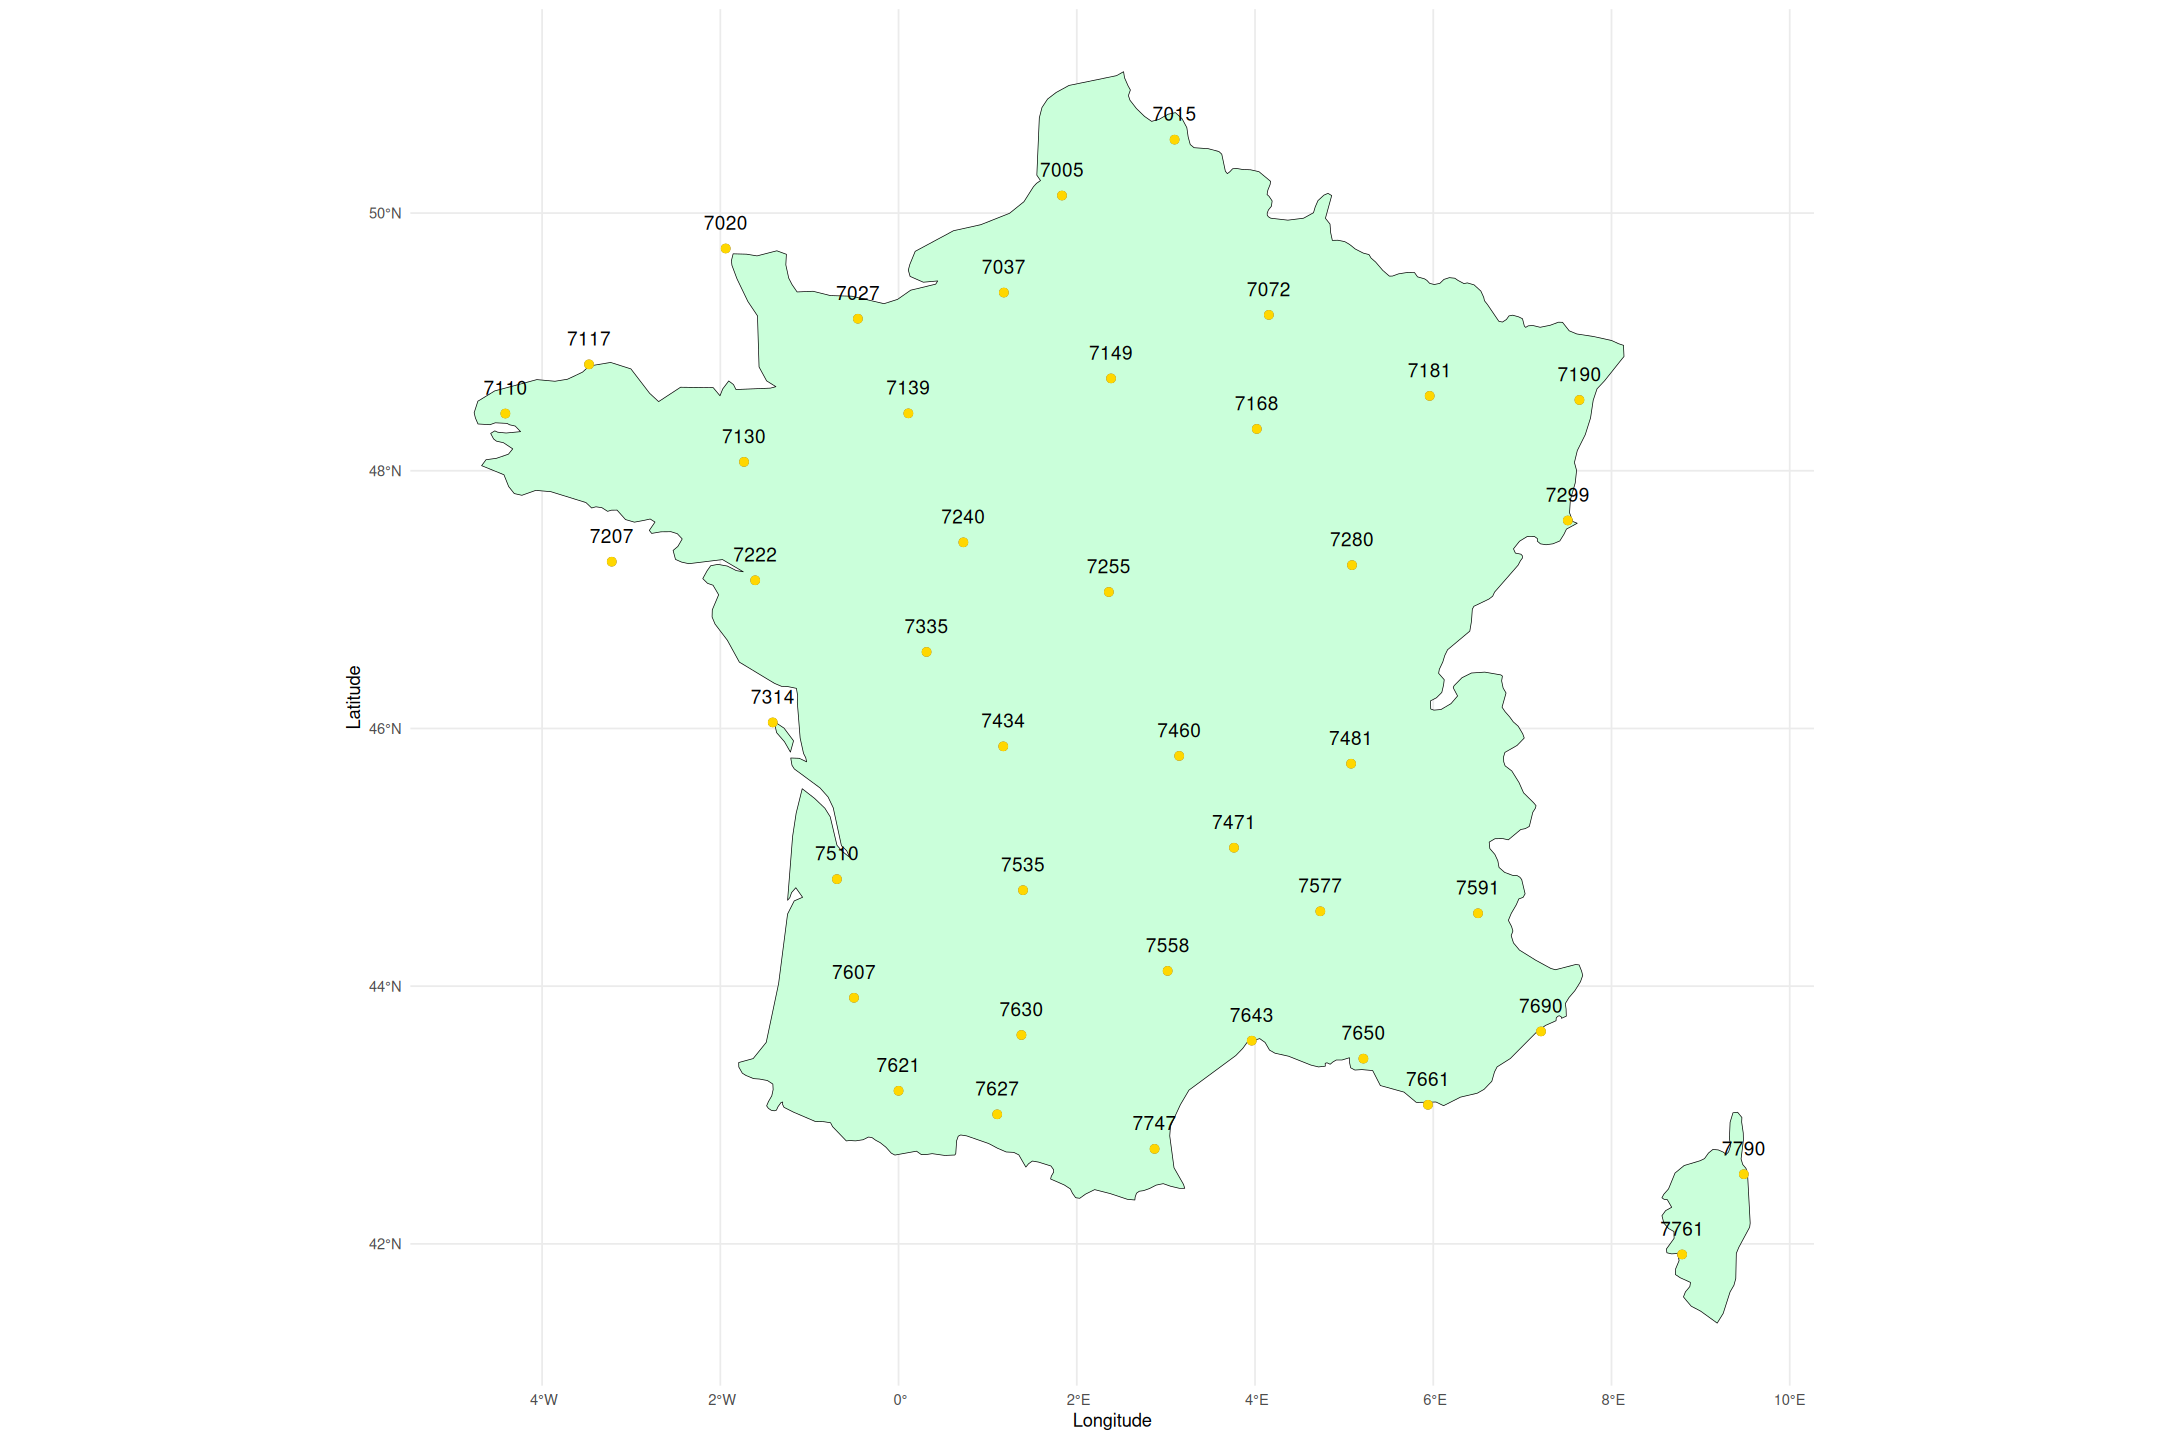

In [10]:
# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 2) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 2.1) +
  theme_minimal()

 [1]  7181 81405  7627 78894  7020  7280  7015  7110 81408  7222  7240  7747
[13]  7027  7790 78925  7510  7761 61976  7149  7072  7130  7190 61980  7005
[25]  7607  7650  7207  7335  7168  7643 78897  7535  7139  7690 78922 61998
[37] 89642  7471  7591 81415  7481  7558  7630 81401  7661  7577  7314  7037
[49] 61996  7434 61968 61972  7621  7460  7117 71805 61997 67005  7299  7255
[61] 78890 61970
[1] "7117" "7299" "7558" "7510"


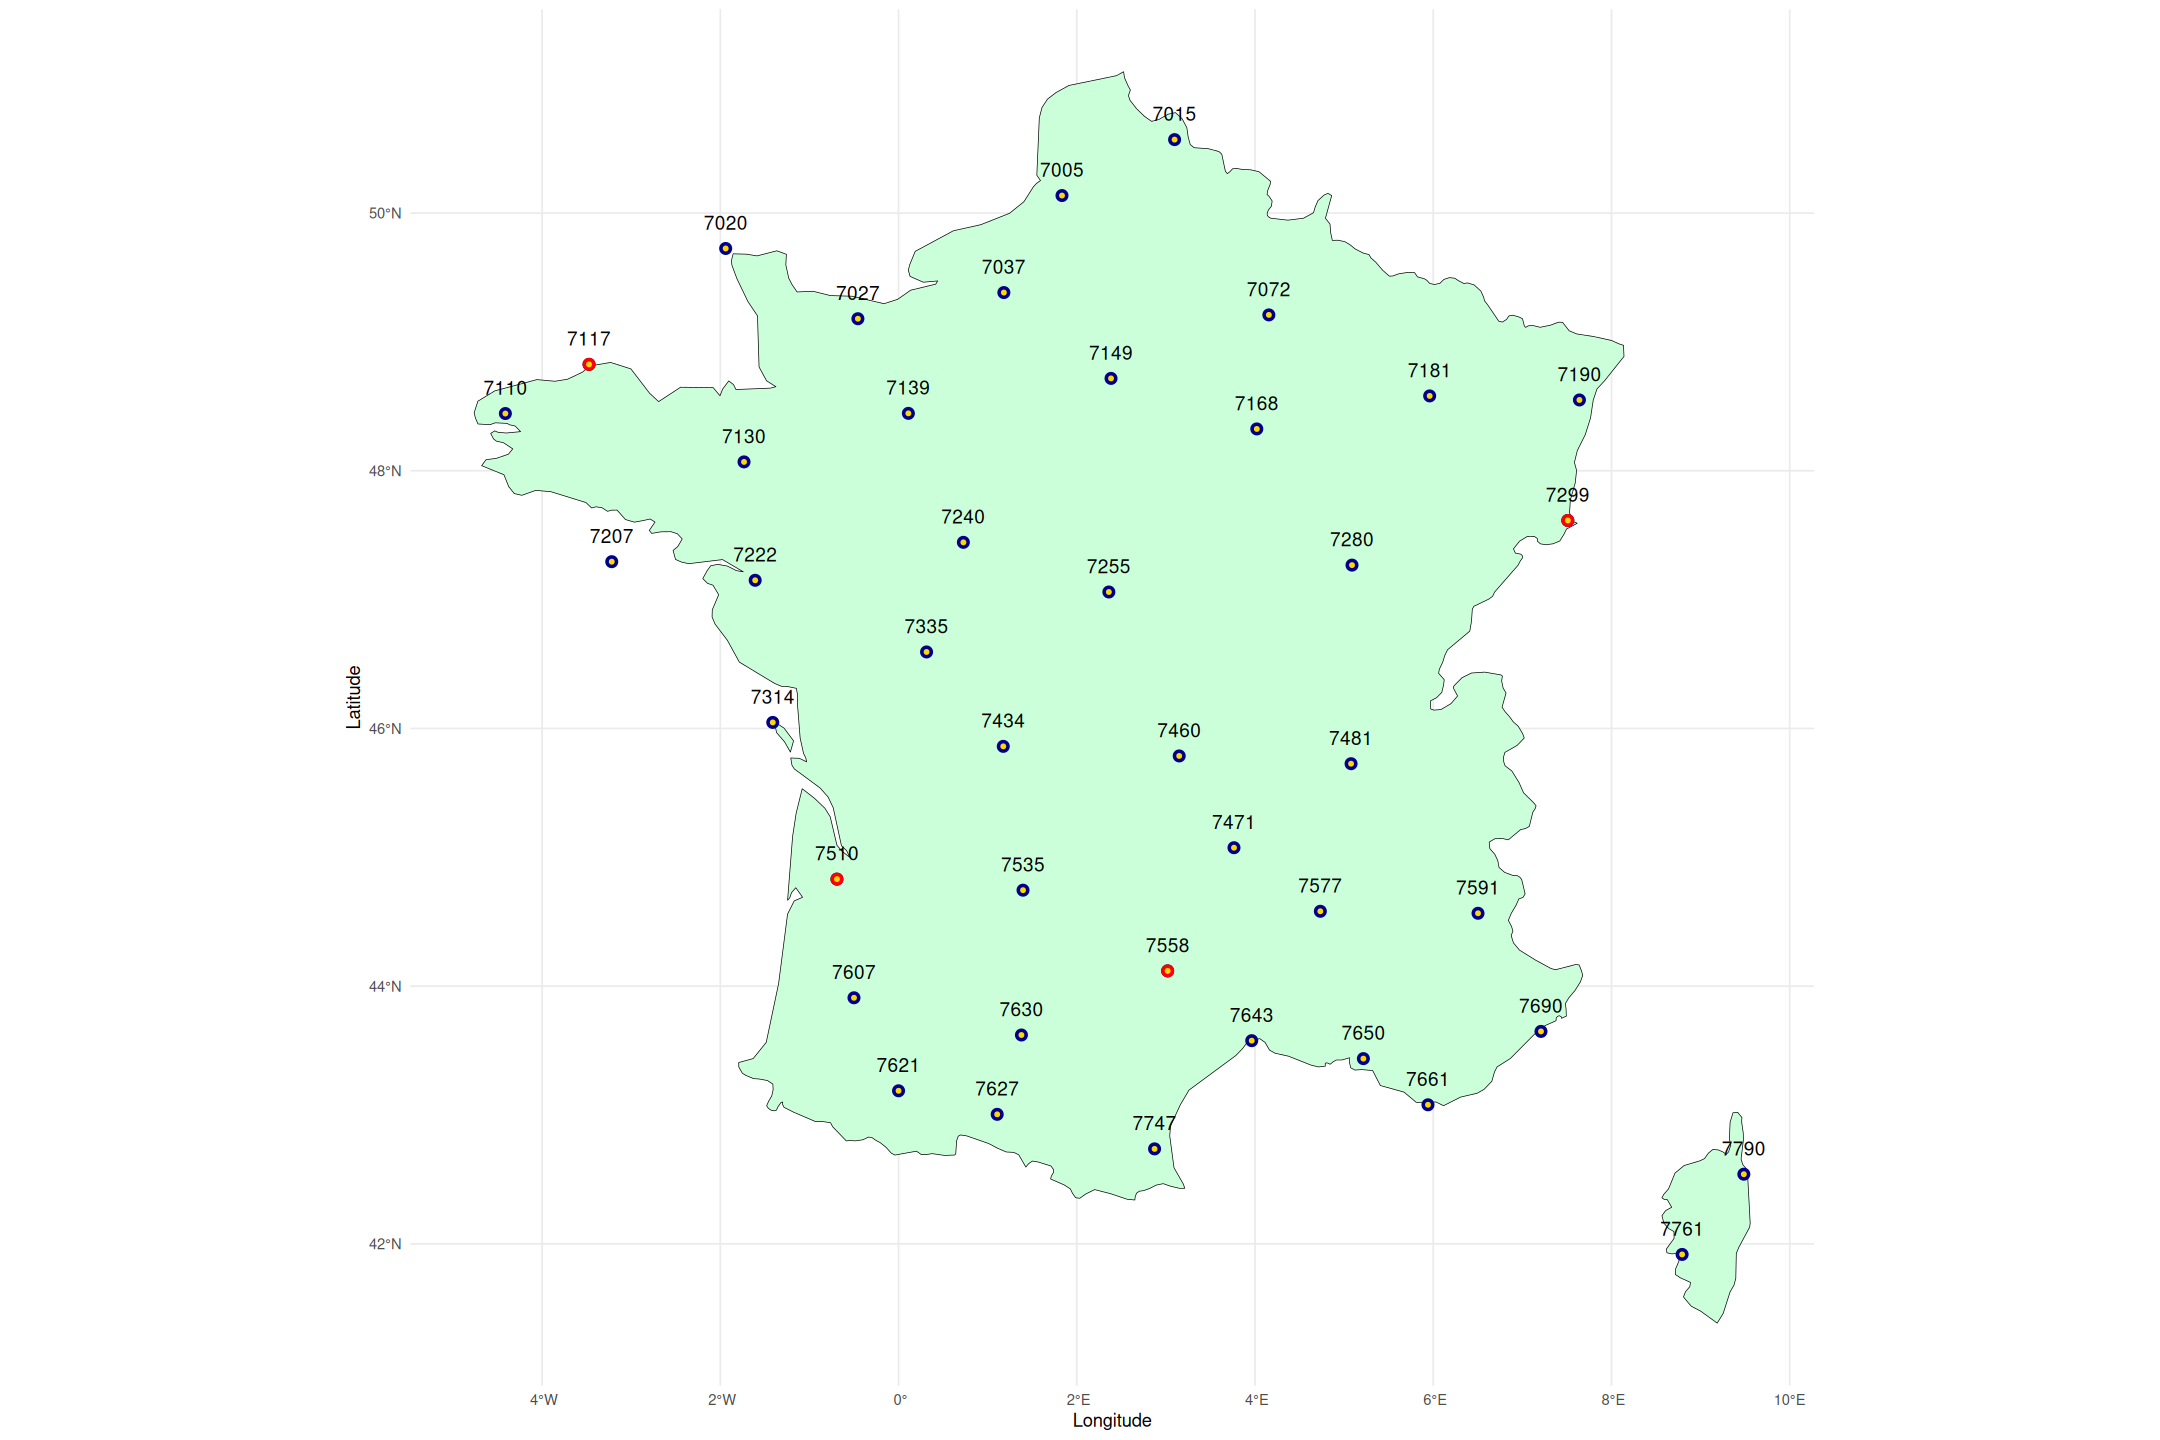

In [11]:
# sélectionne 4 stations à afficher sur les graphes
chosen_stations = c("7117", "7299", "7558", "7510")
for(station in chosen_stations){
  if(!(station %in% stations_in_file)){
    msg = glue("station {station} not in file ! replace it in the definition of chosen_station.")
    print(msg)
  }
}
print(stations_in_file)
print(chosen_stations)

# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.
# en rouge, une les stations SÉLECTIONNÉES

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% chosen_stations, ], 
            aes(x = Longitude, y = Latitude), 
            color = "red", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  theme_minimal()

## Fonction utiles

In [12]:

cboxplot <- function(xs, title, legx, legy){
    my_colors <- c("#FFA500", "#008000", "#1E90FF", "#FF1493")
    tryCatch(
        {
            par(bg = 'white')
            boxplot(xs, xlab = legx, ylab = legy, las = 1, col = my_colors)
            grid()
        },
        error=function(e) {
            message('An error occurred (in histogram function)')
            print("with title")
            print(e)
        })
}

In [13]:


# Return columns required, with only the rows related to chosen_stations.
ColumnSelector <- function(columns, chosen_stations){
    return( select(full_data %>% filter(ID.OMM.station %in% chosen_stations), all_of(columns)) )
}


# take a column and a selectionof stations
# Return a dataframe like
#
#   station1    station2    ...
#     c1_1        c2_1      ...
#     c1_2        c2_2
#...
ColumnSplitSelector <- function(column, chosen_stations) {
    selections <- list()
    i = 1
    max_length <- 0

    # First pass: find the maximum length
    for (s in chosen_stations) {
        vec <- full_data %>%
            filter(ID.OMM.station == s) %>%
            pull({{column}})
        selections[[i]] <- vec
        max_length <- max(max_length, length(vec))
        i <- i + 1
    }
    # Second pass: pad each vector with NA to max_length
    for (j in seq_along(selections)) {
        if (length(selections[[j]]) < max_length) {
            selections[[j]] <- c(selections[[j]], rep(NA, max_length - length(selections[[j]])))
        }
    }
    # Combine
    df <- do.call(cbind, selections)
    colnames(df) <- chosen_stations
    colnames(df) <- paste("Station", colnames(df), sep = "_")
    return(as.data.frame(df))
}



# histogramme sur sélection auto
autoboxplot <- function(column, chosen_stations){
    titlec = gsub("[[:punct:]]", " ", column)
    df_extract_cs = ColumnSplitSelector(column, chosen_stations)
    #print(df_extract_cs)
    cboxplot(xs = df_extract_cs, titlec, legx = "Selected stations" ,legy = column)
    #title(titlec)
}


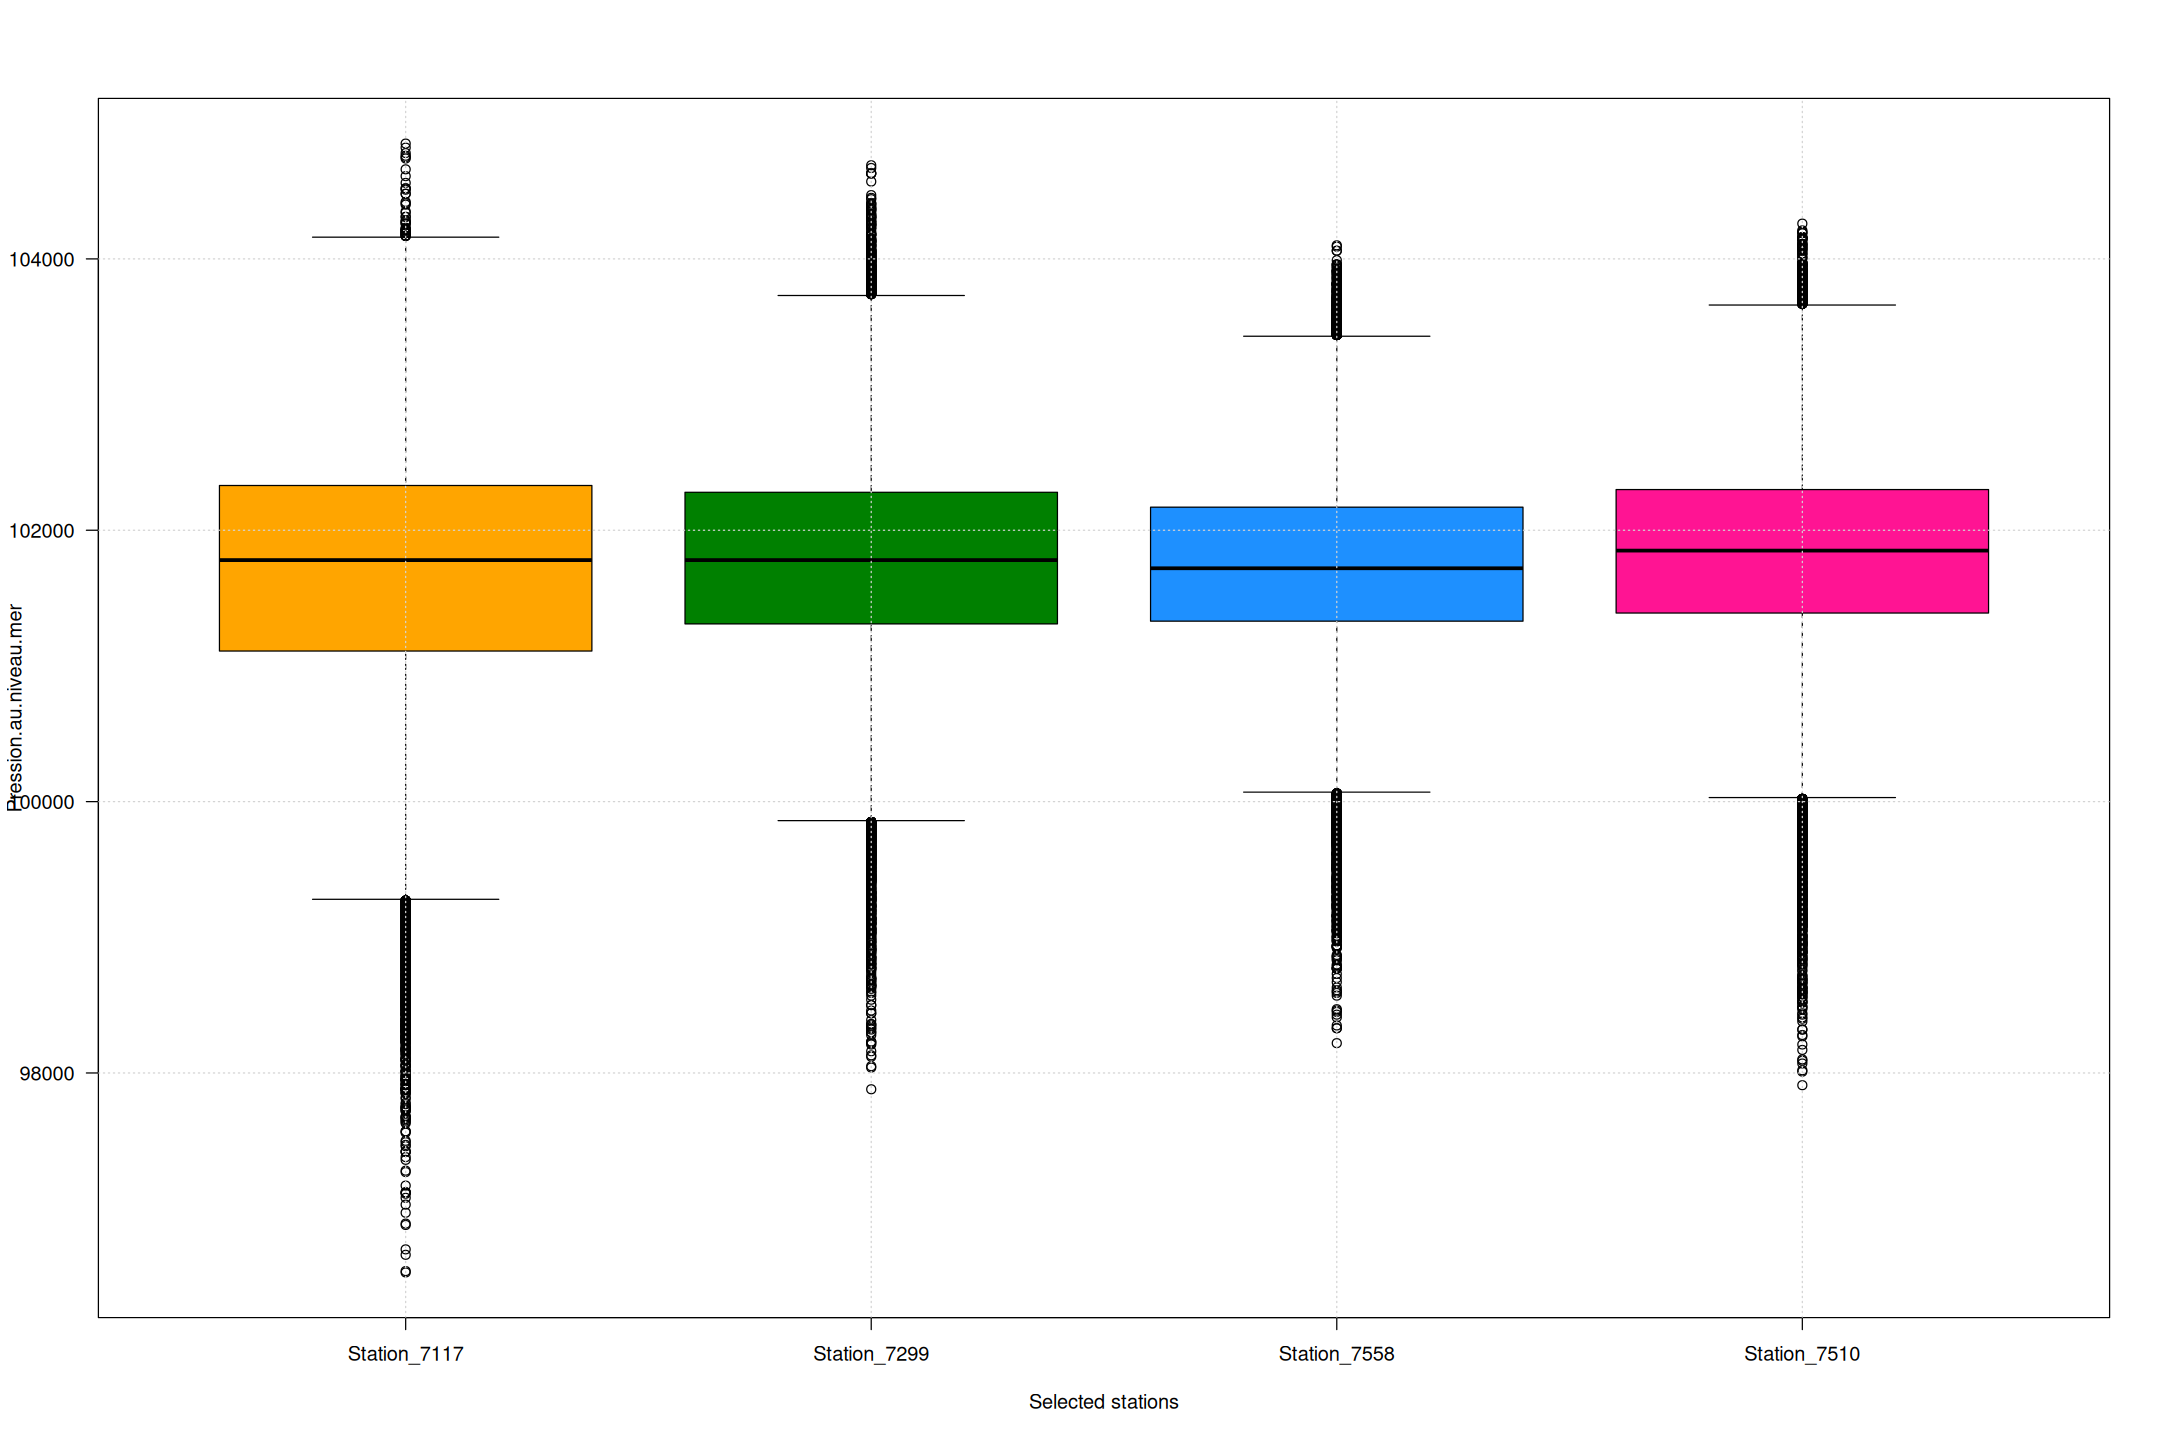

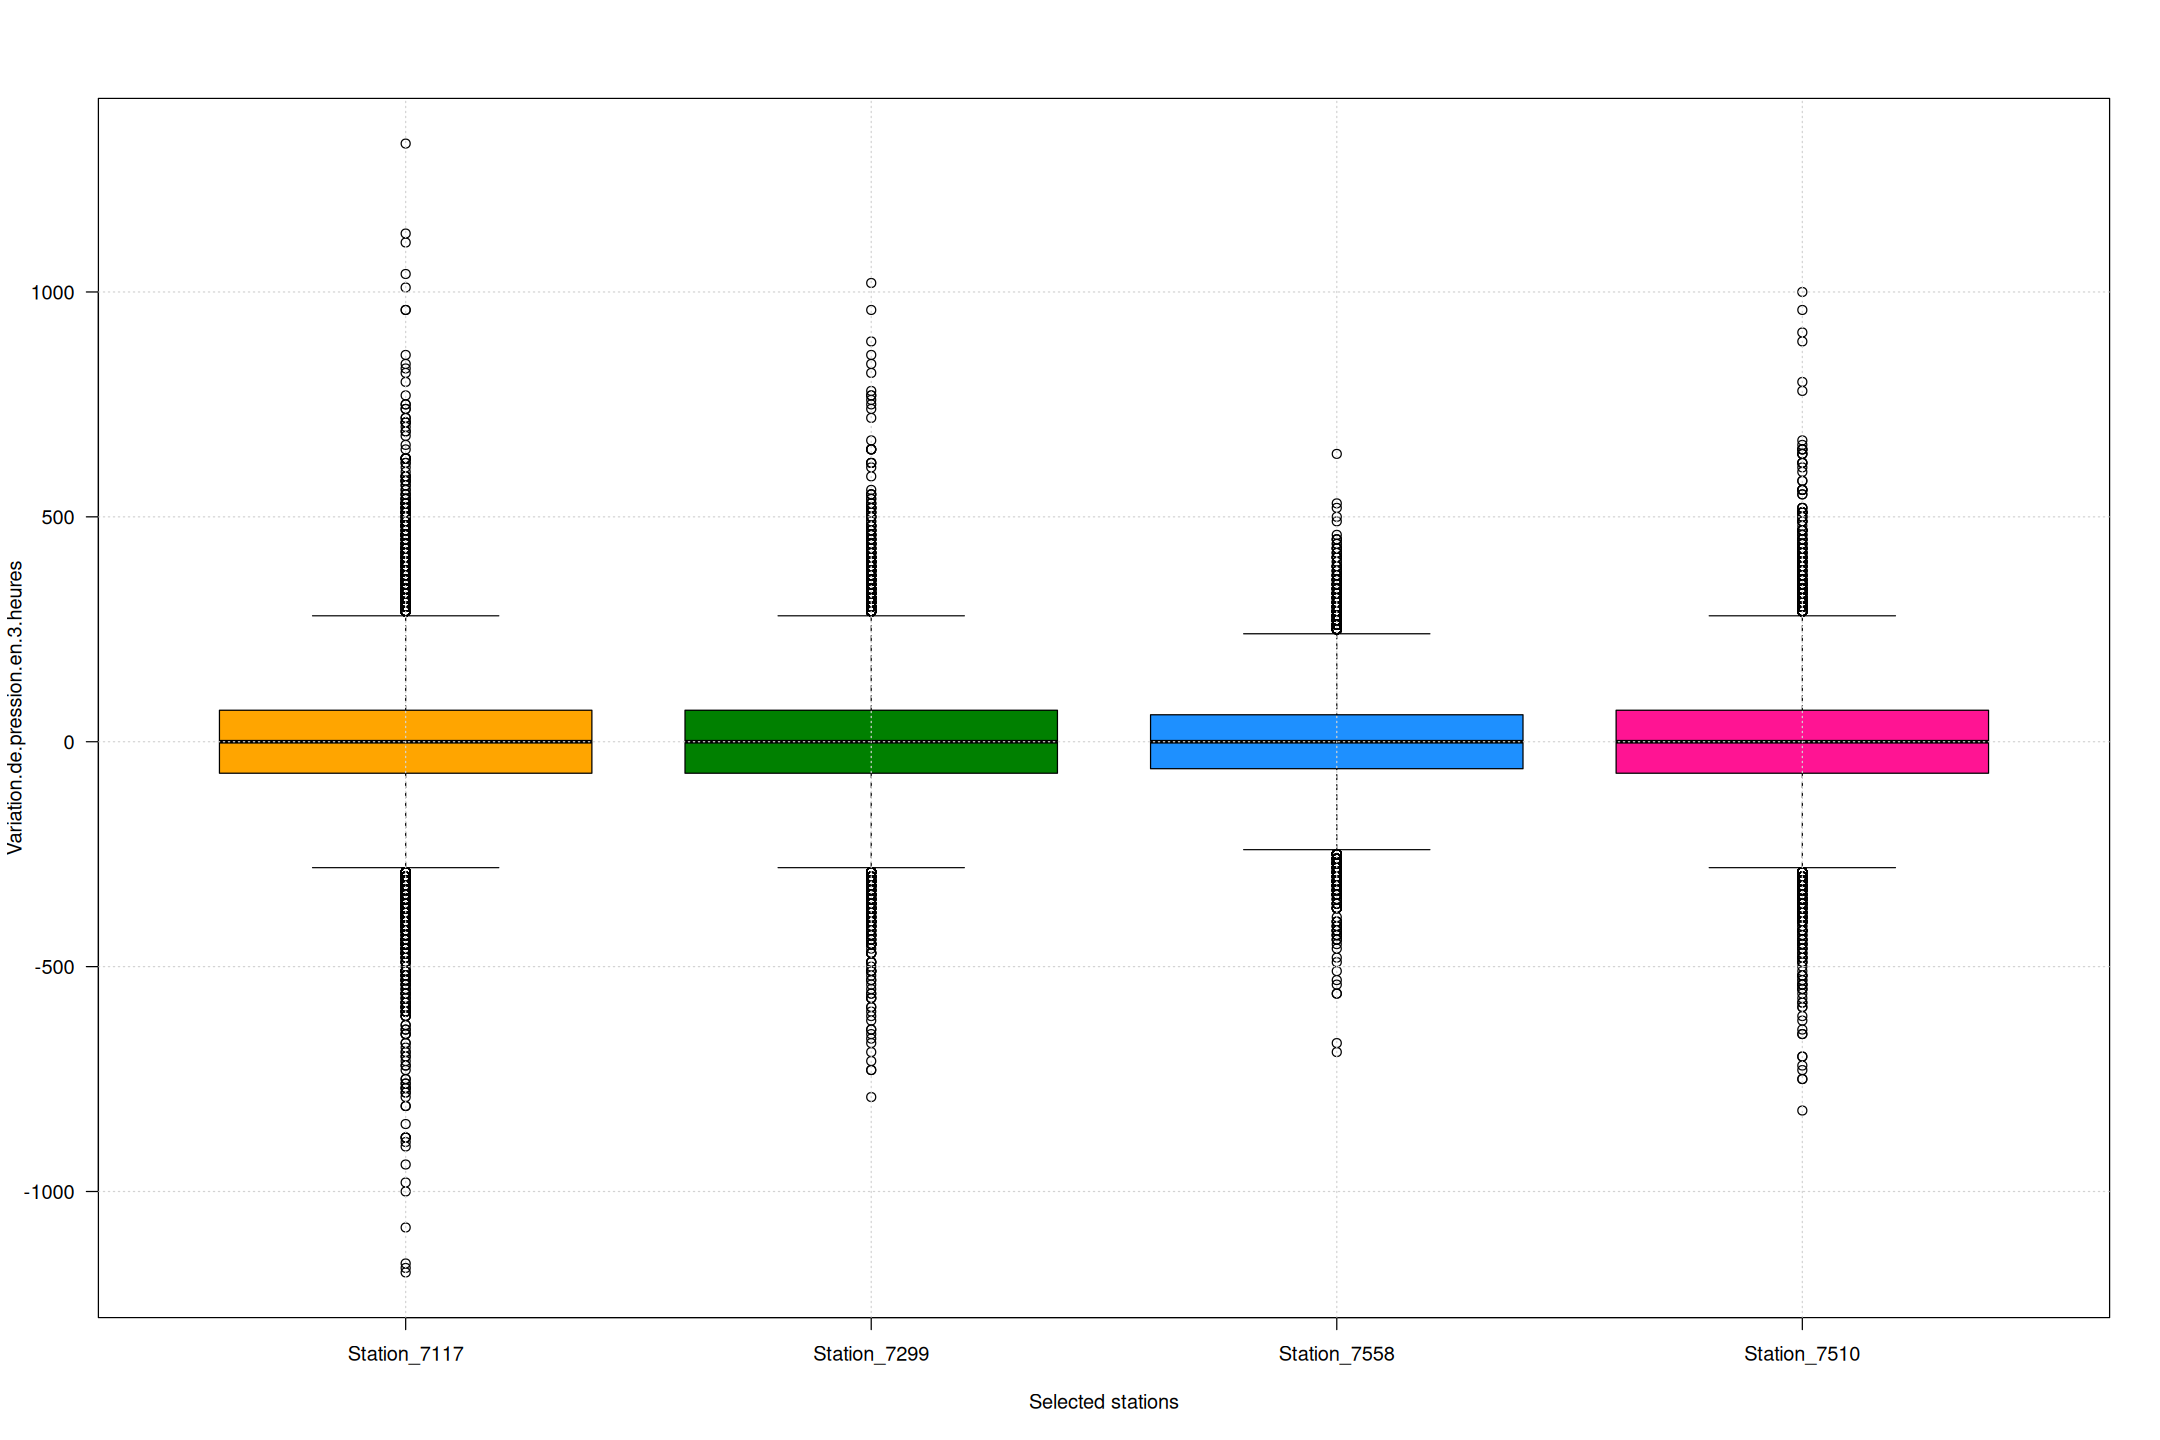

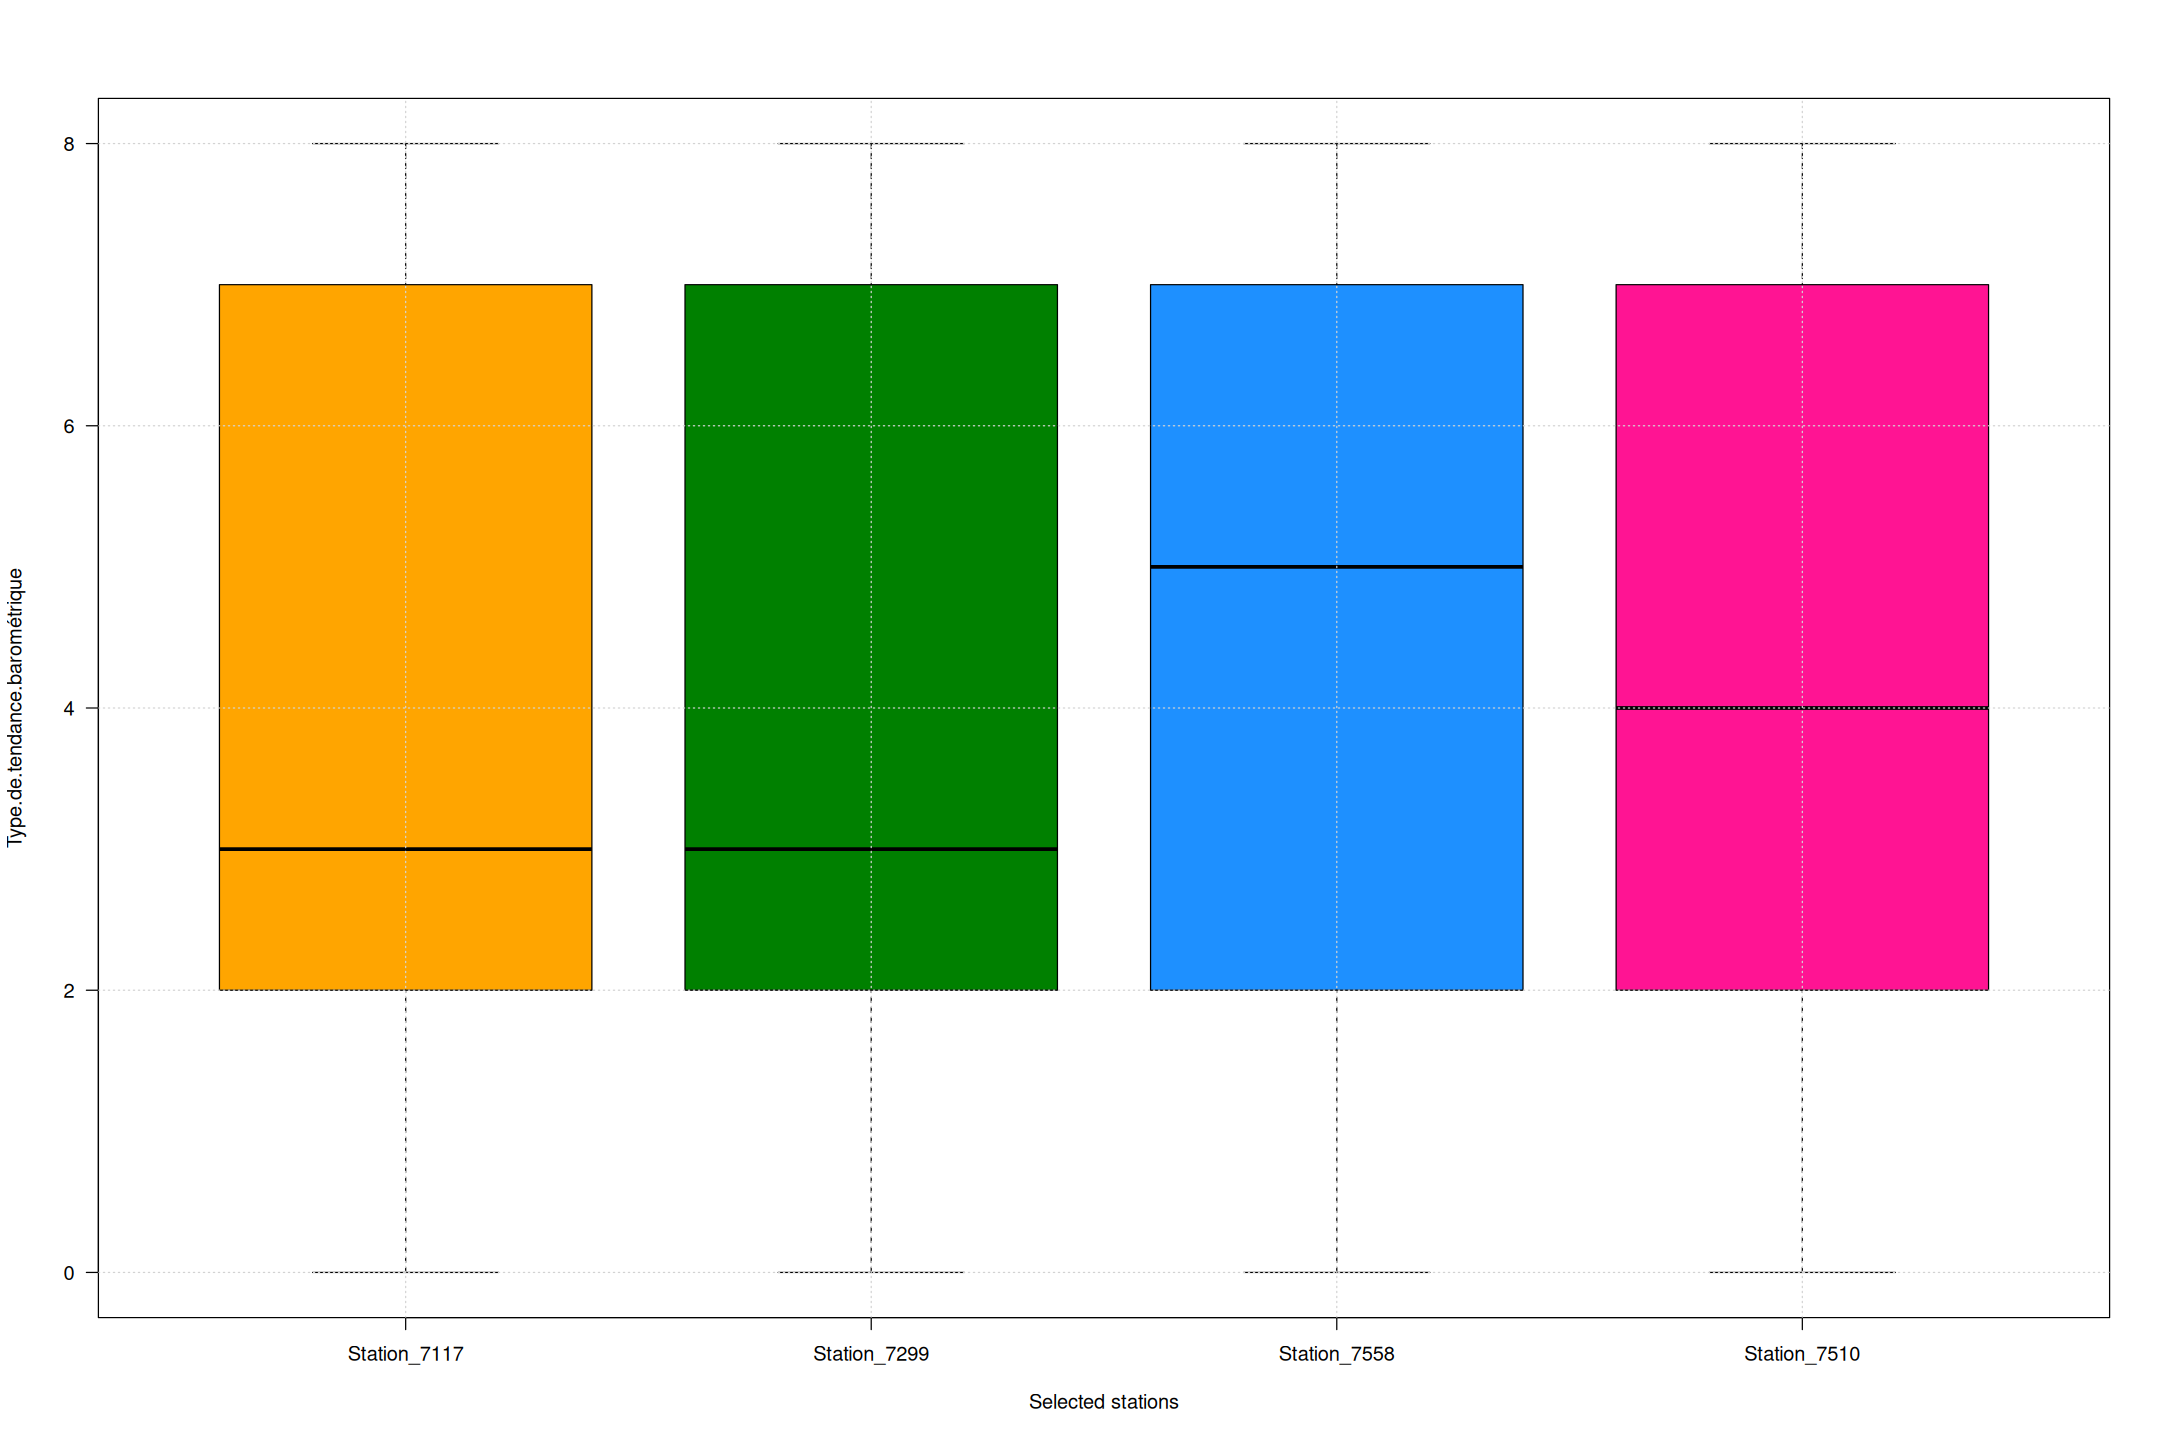

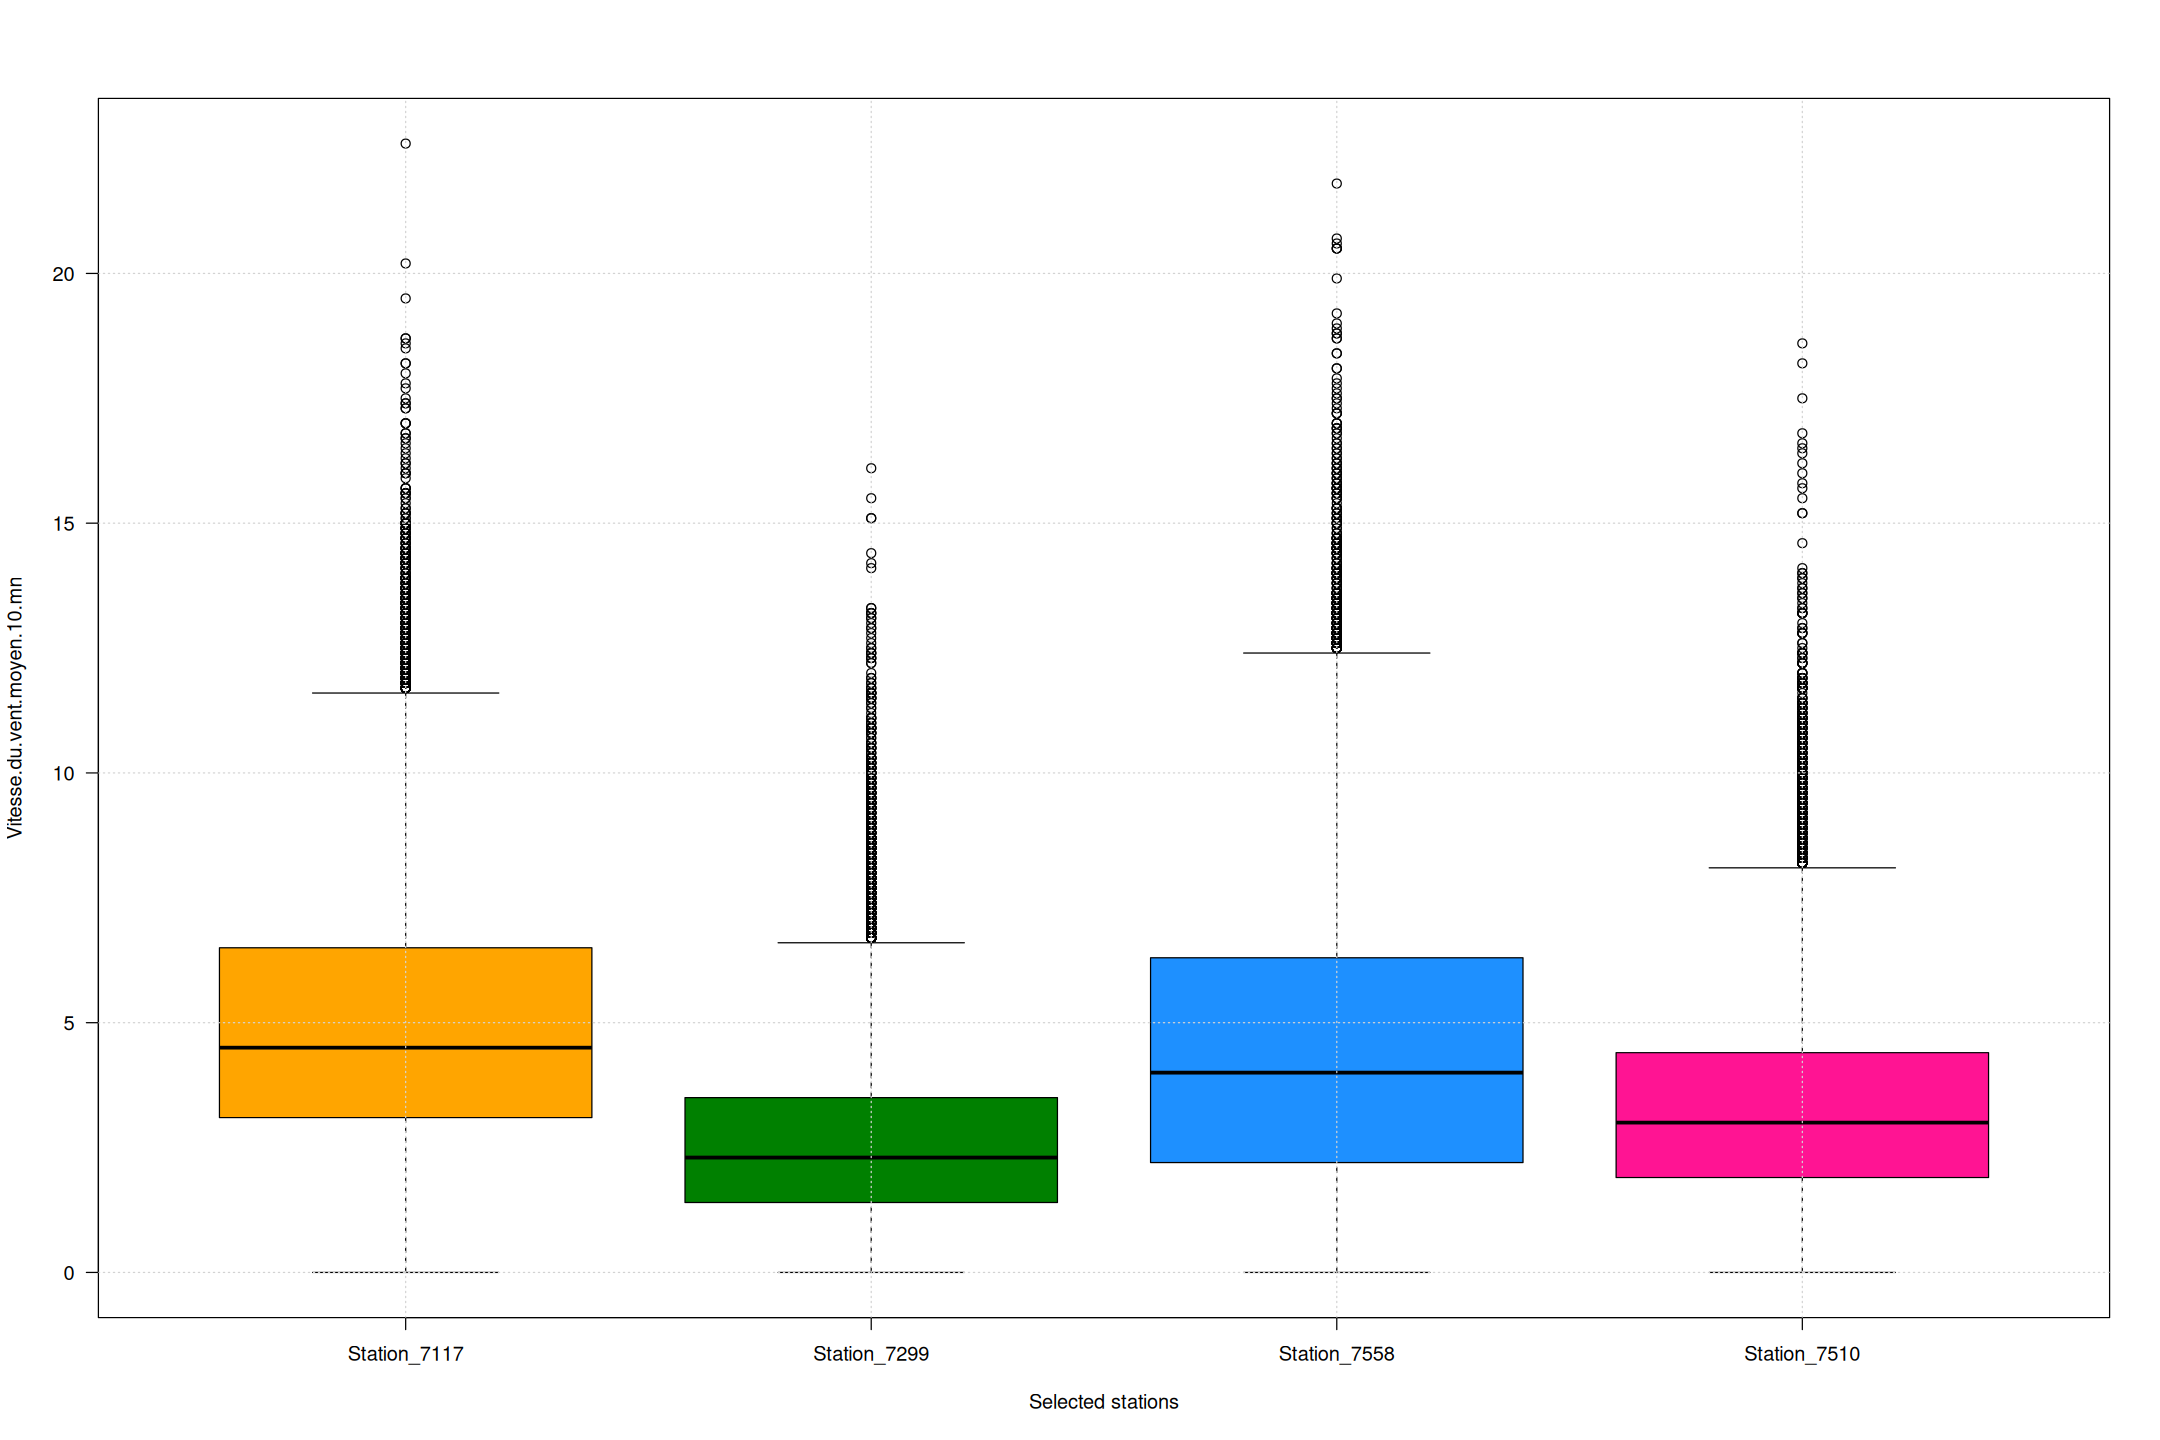

In [14]:
autoboxplot("Pression.au.niveau.mer", chosen_stations)
autoboxplot("Variation.de.pression.en.3.heures", chosen_stations)
autoboxplot("Type.de.tendance.barométrique", chosen_stations)
autoboxplot("Vitesse.du.vent.moyen.10.mn", chosen_stations)


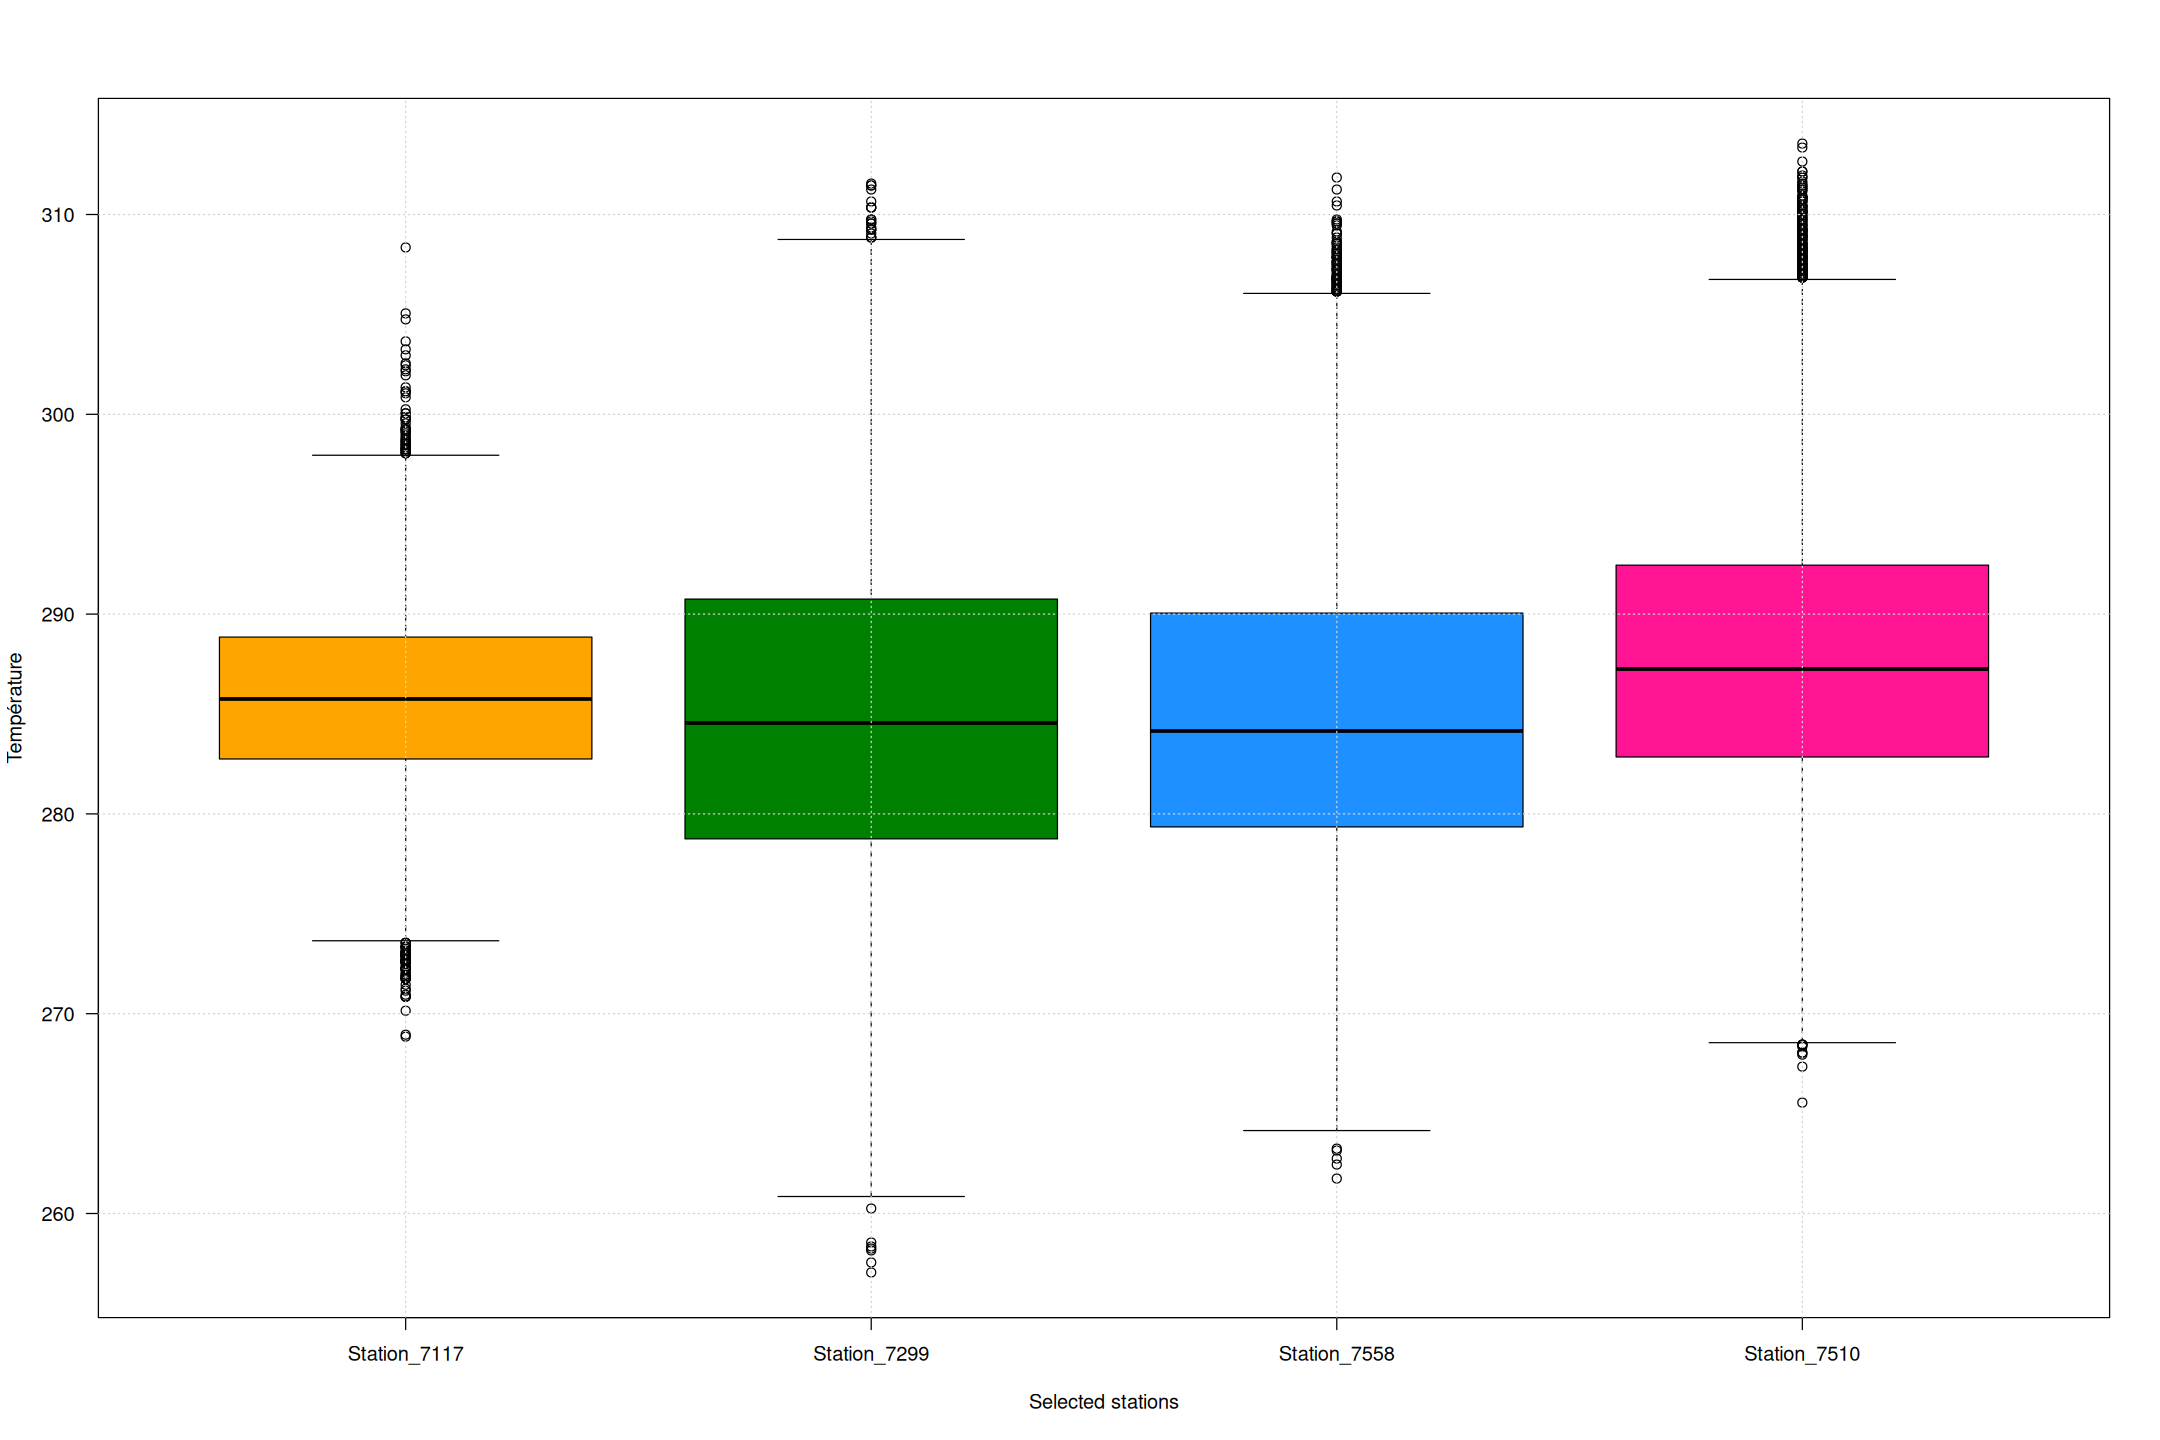

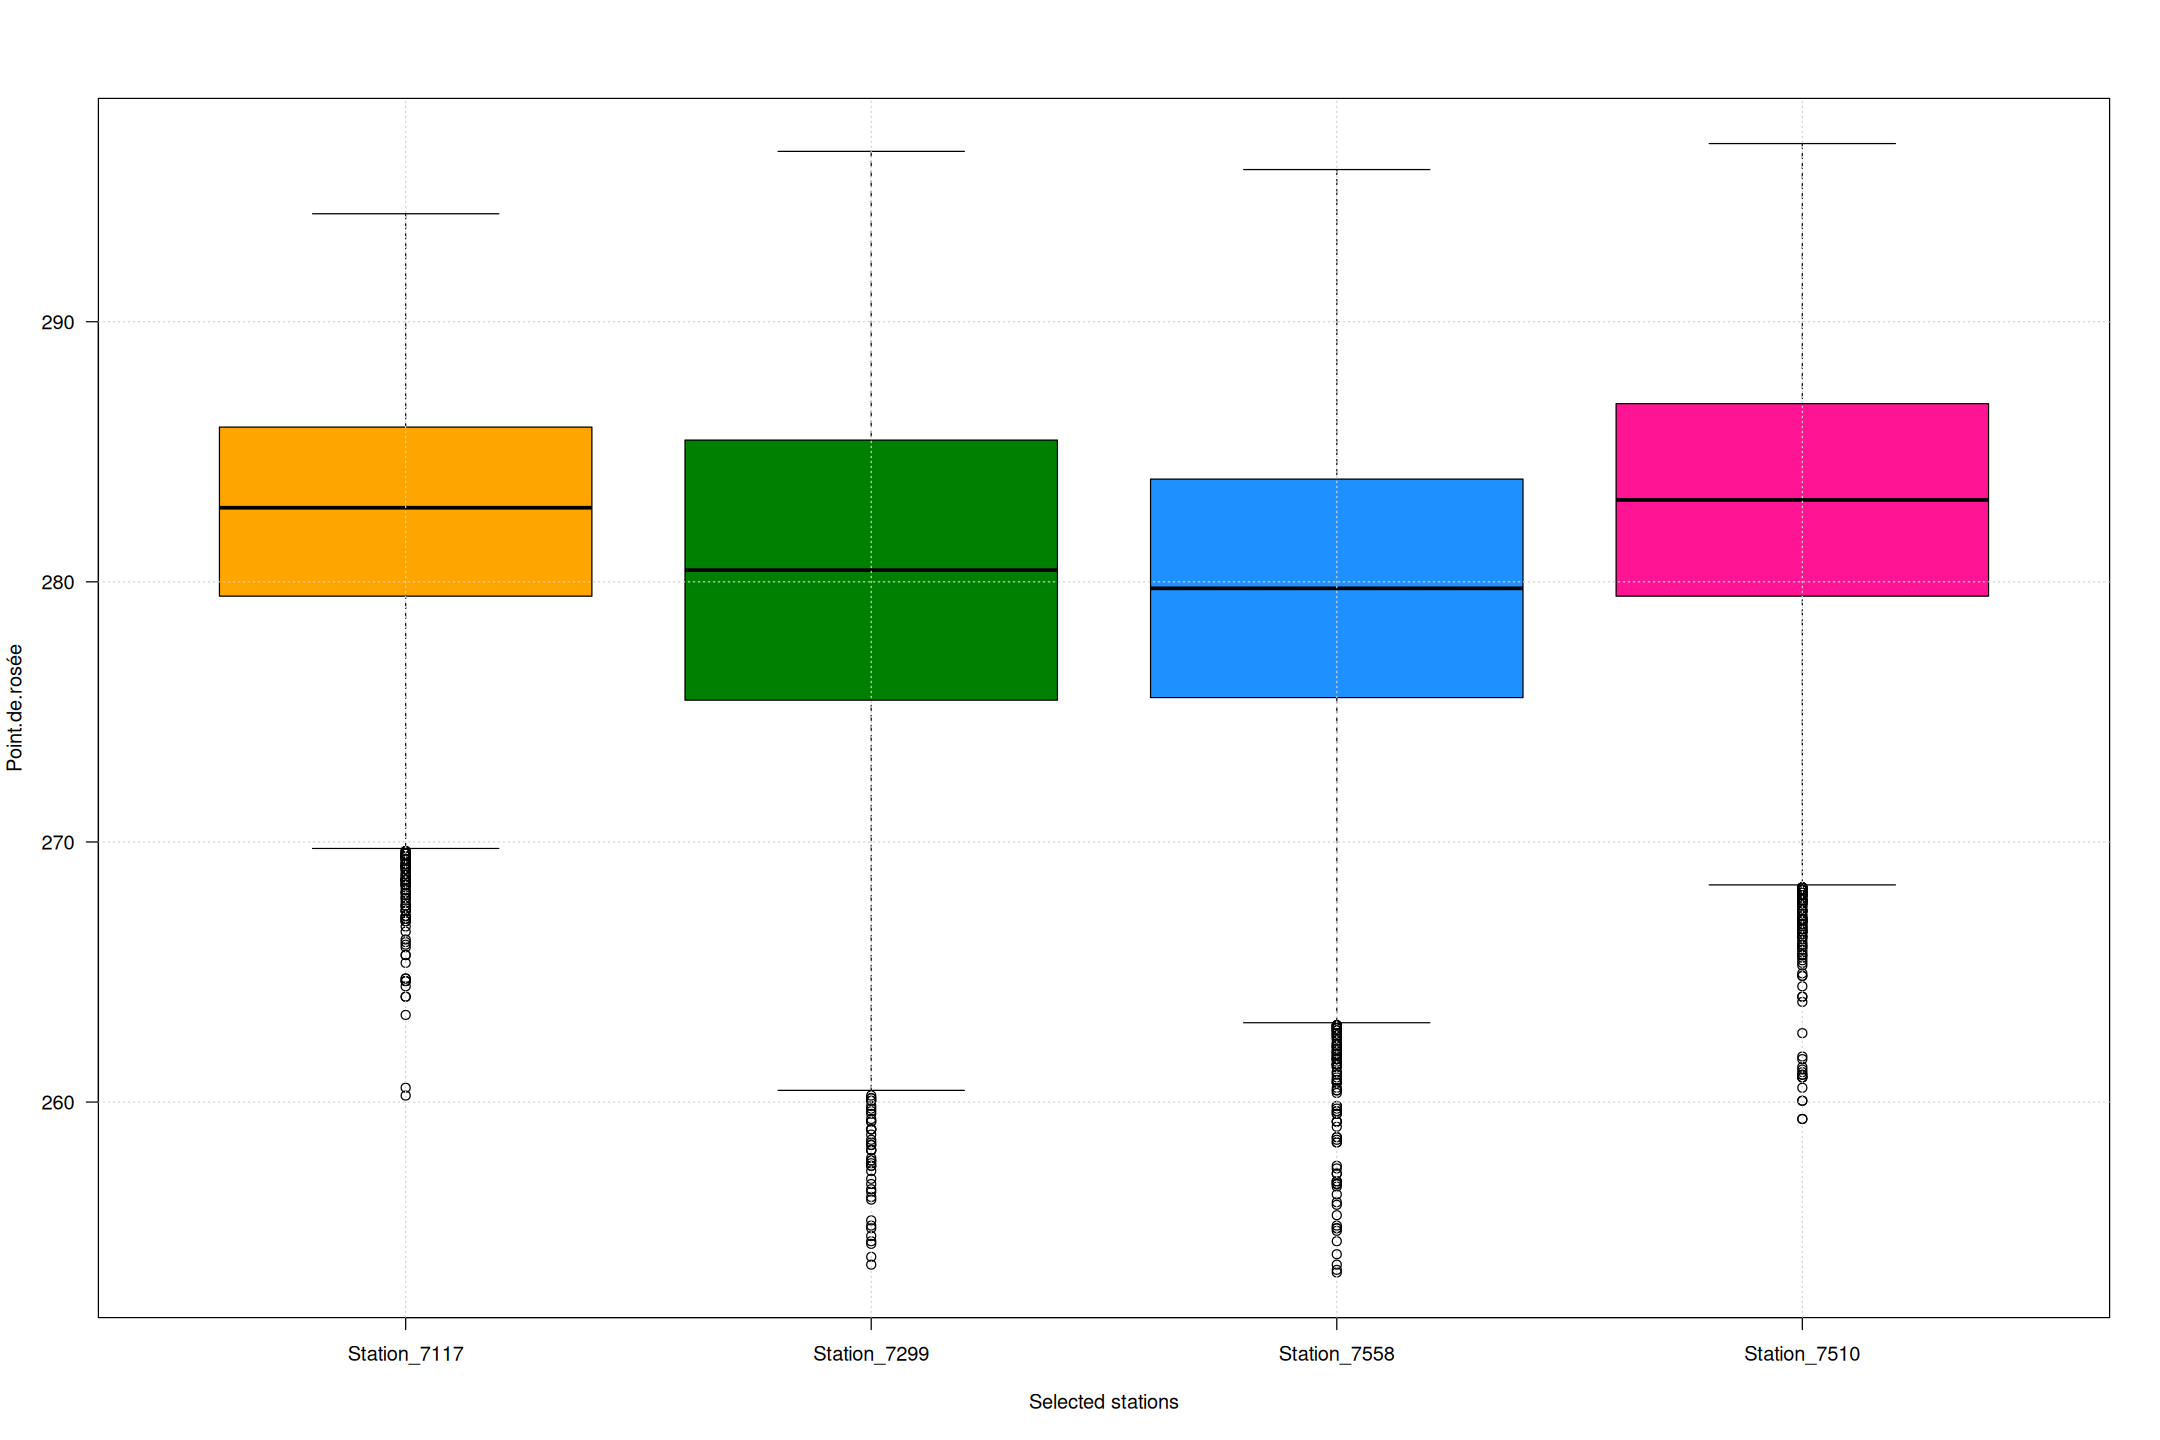

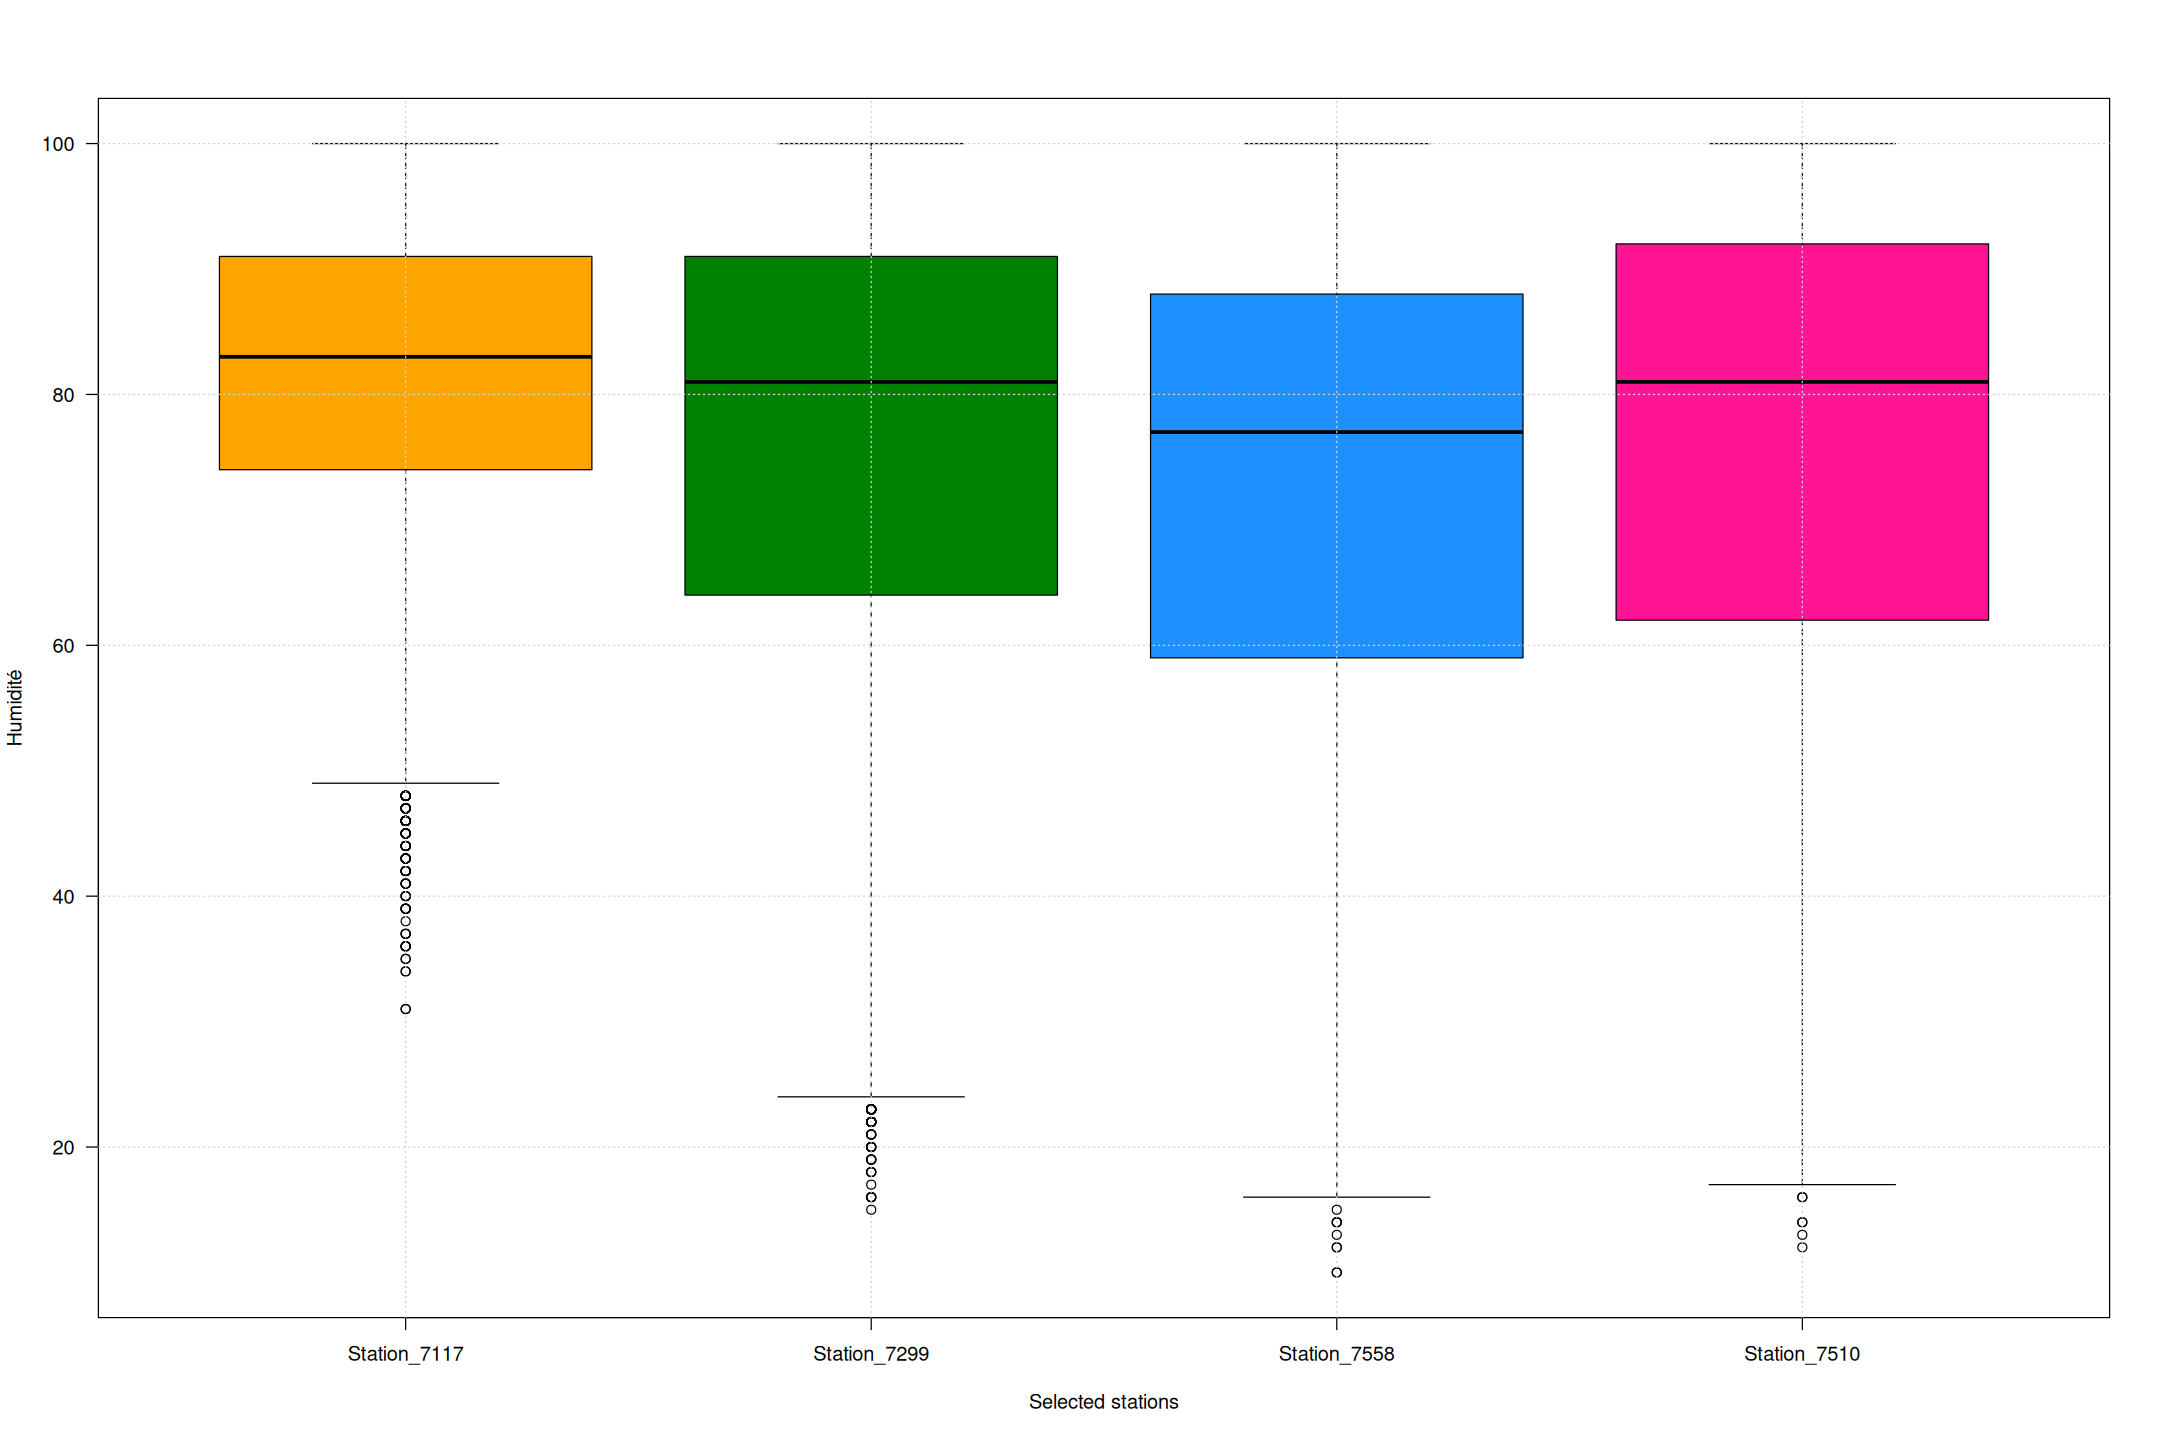

In [15]:

autoboxplot("Température", chosen_stations)
autoboxplot("Point.de.rosée", chosen_stations)
autoboxplot("Humidité", chosen_stations)


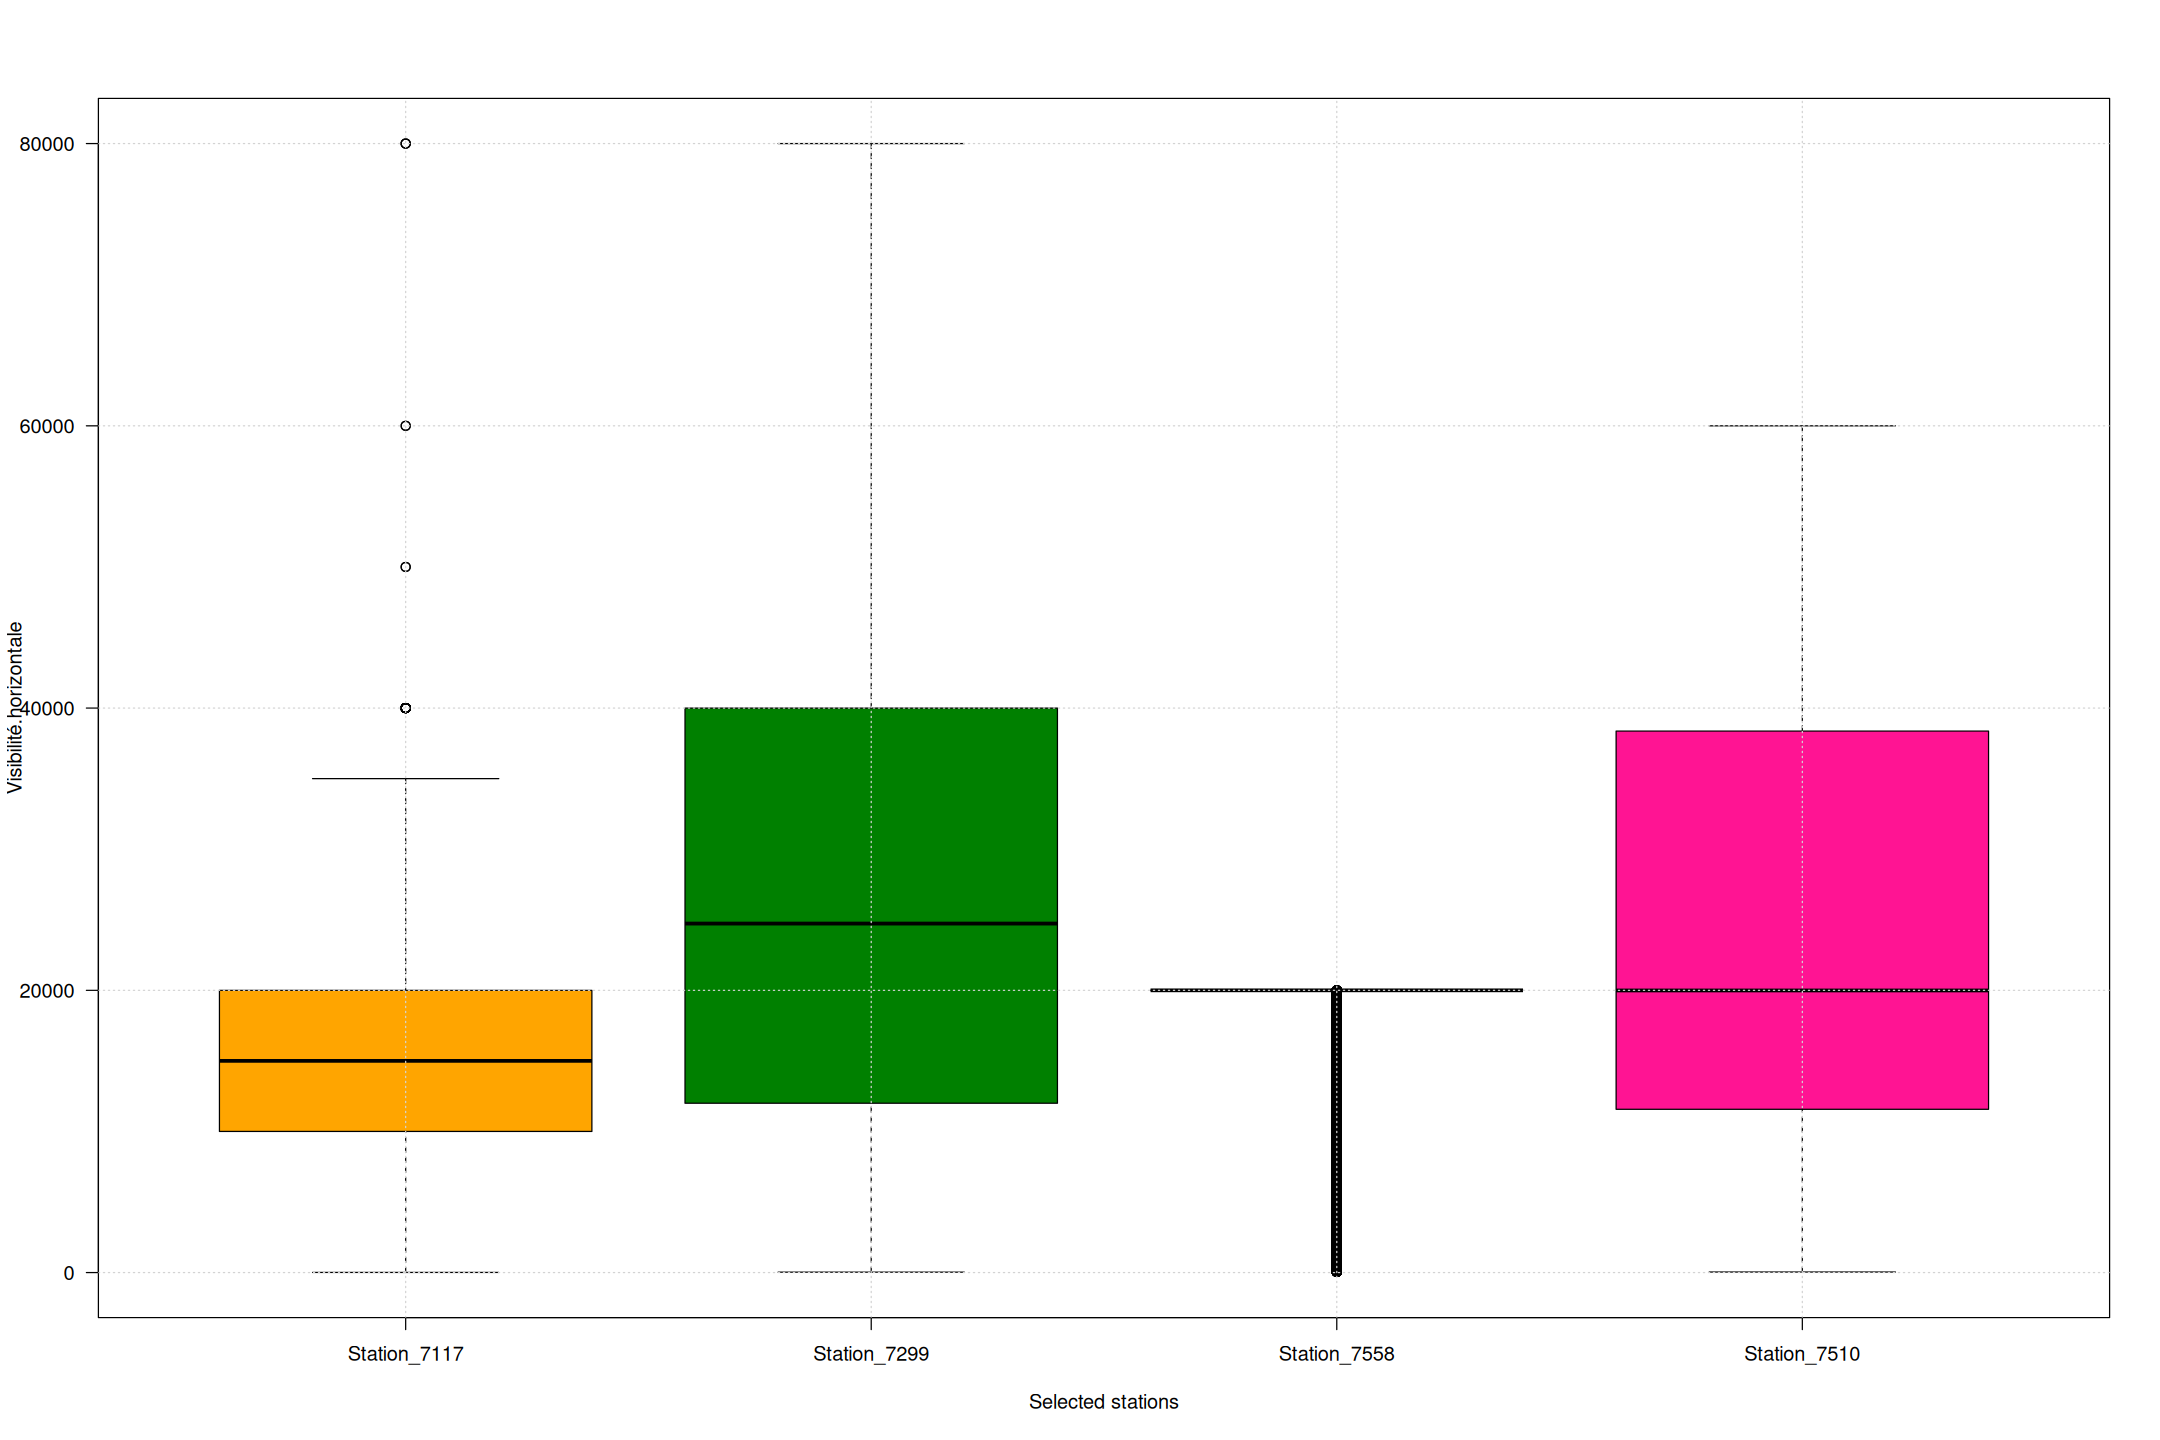

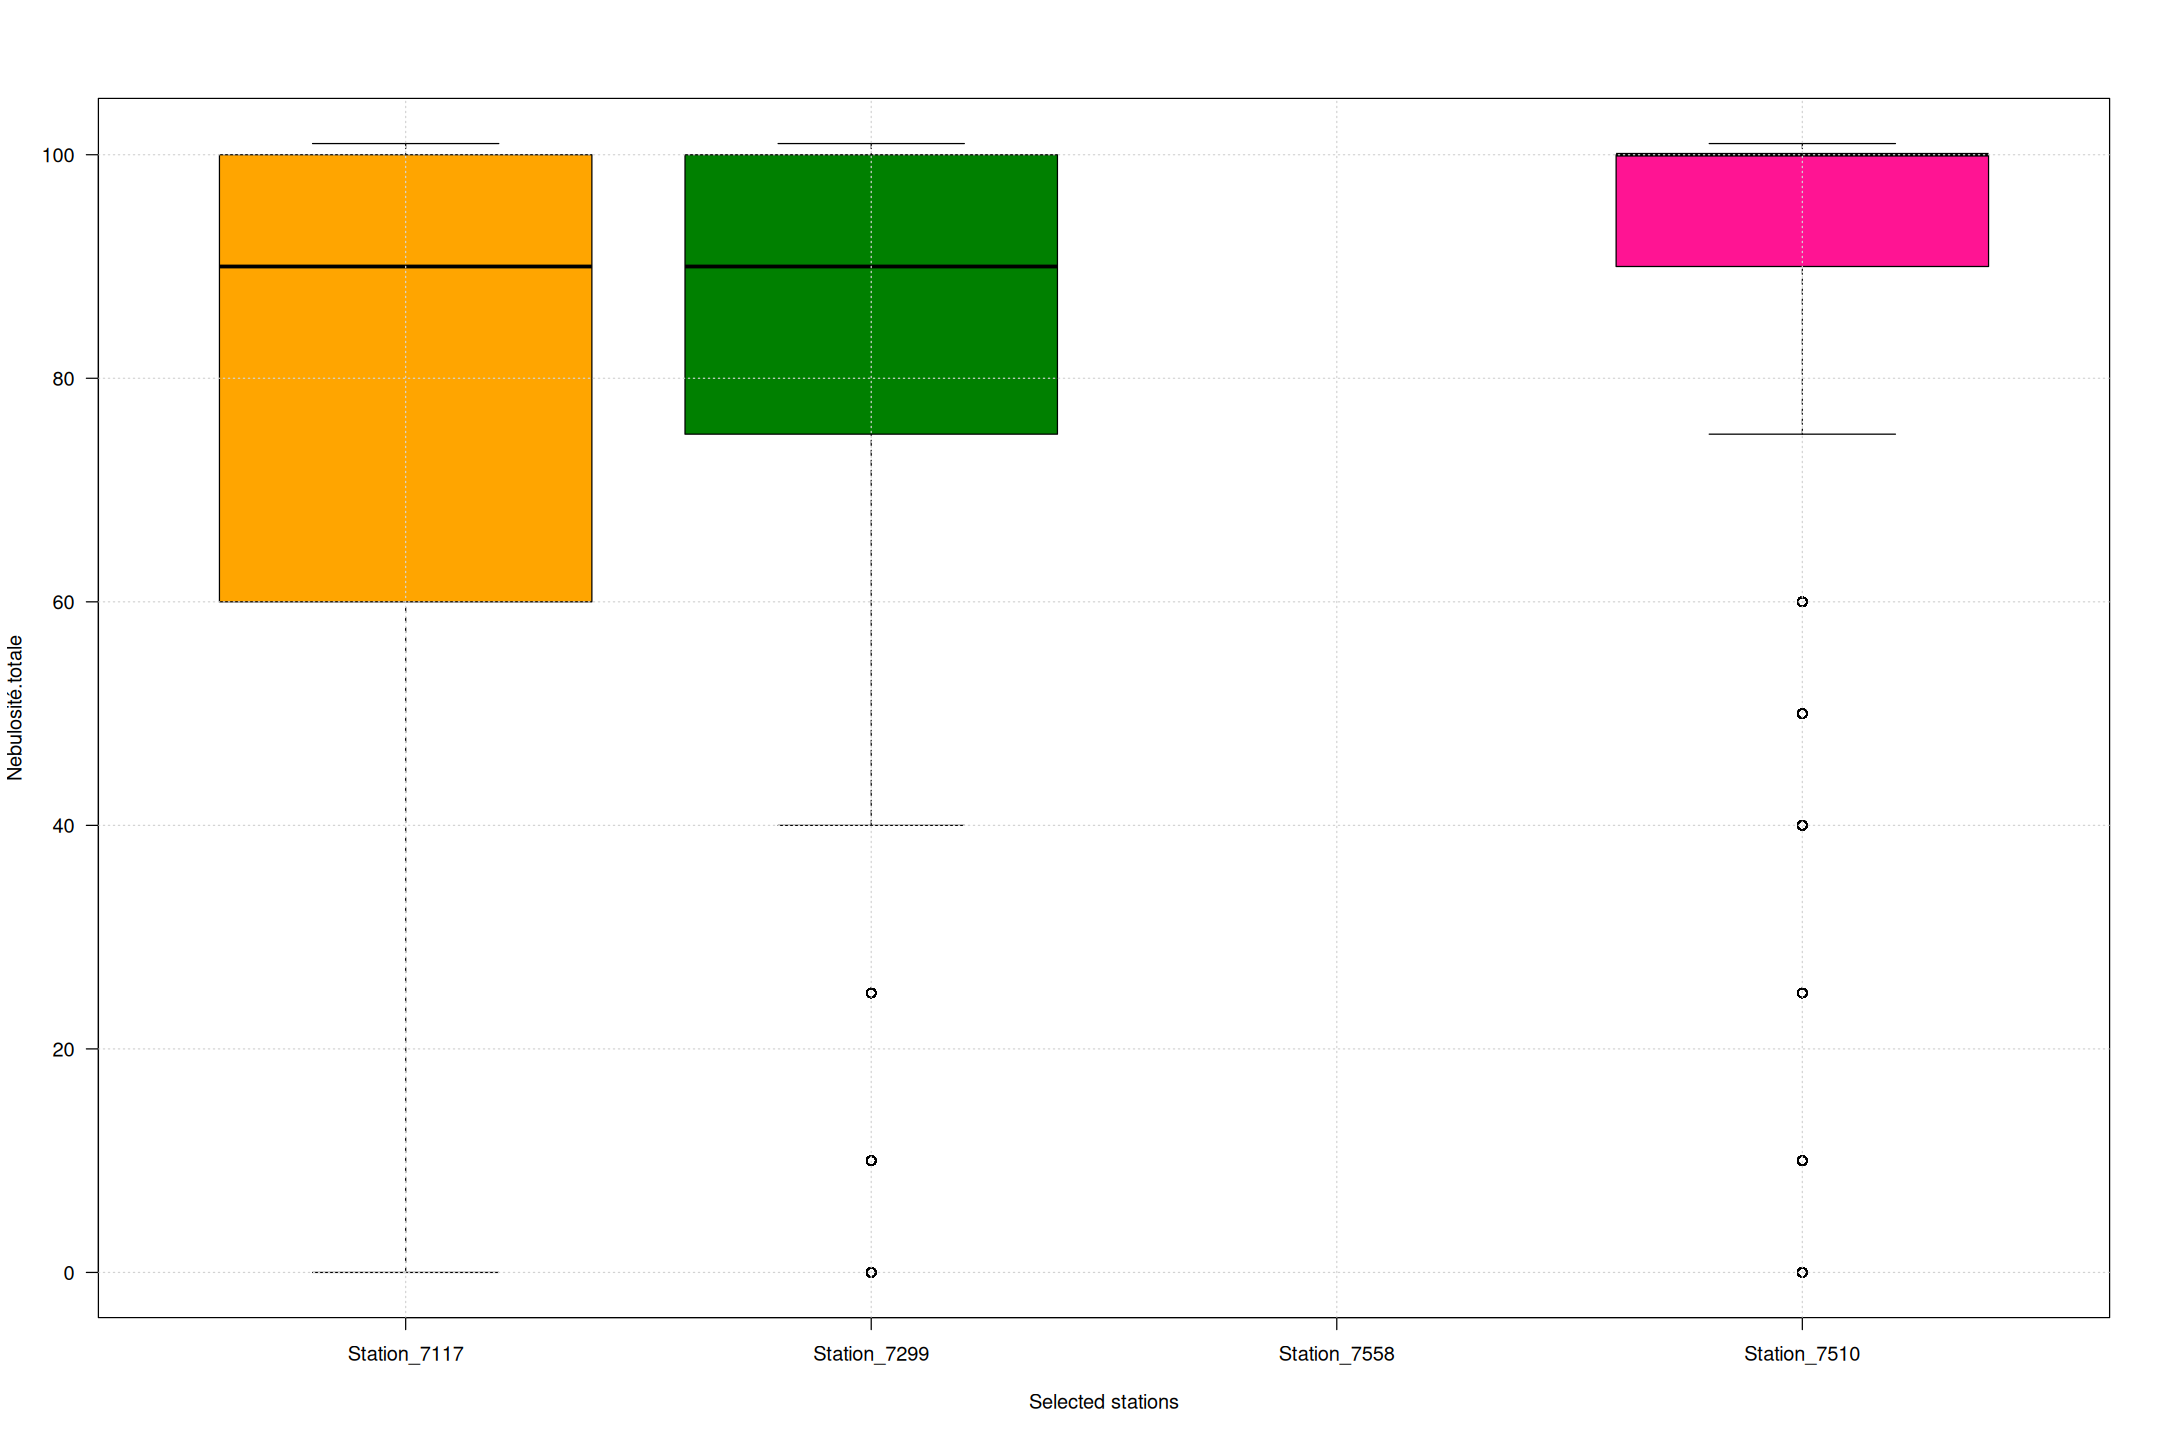

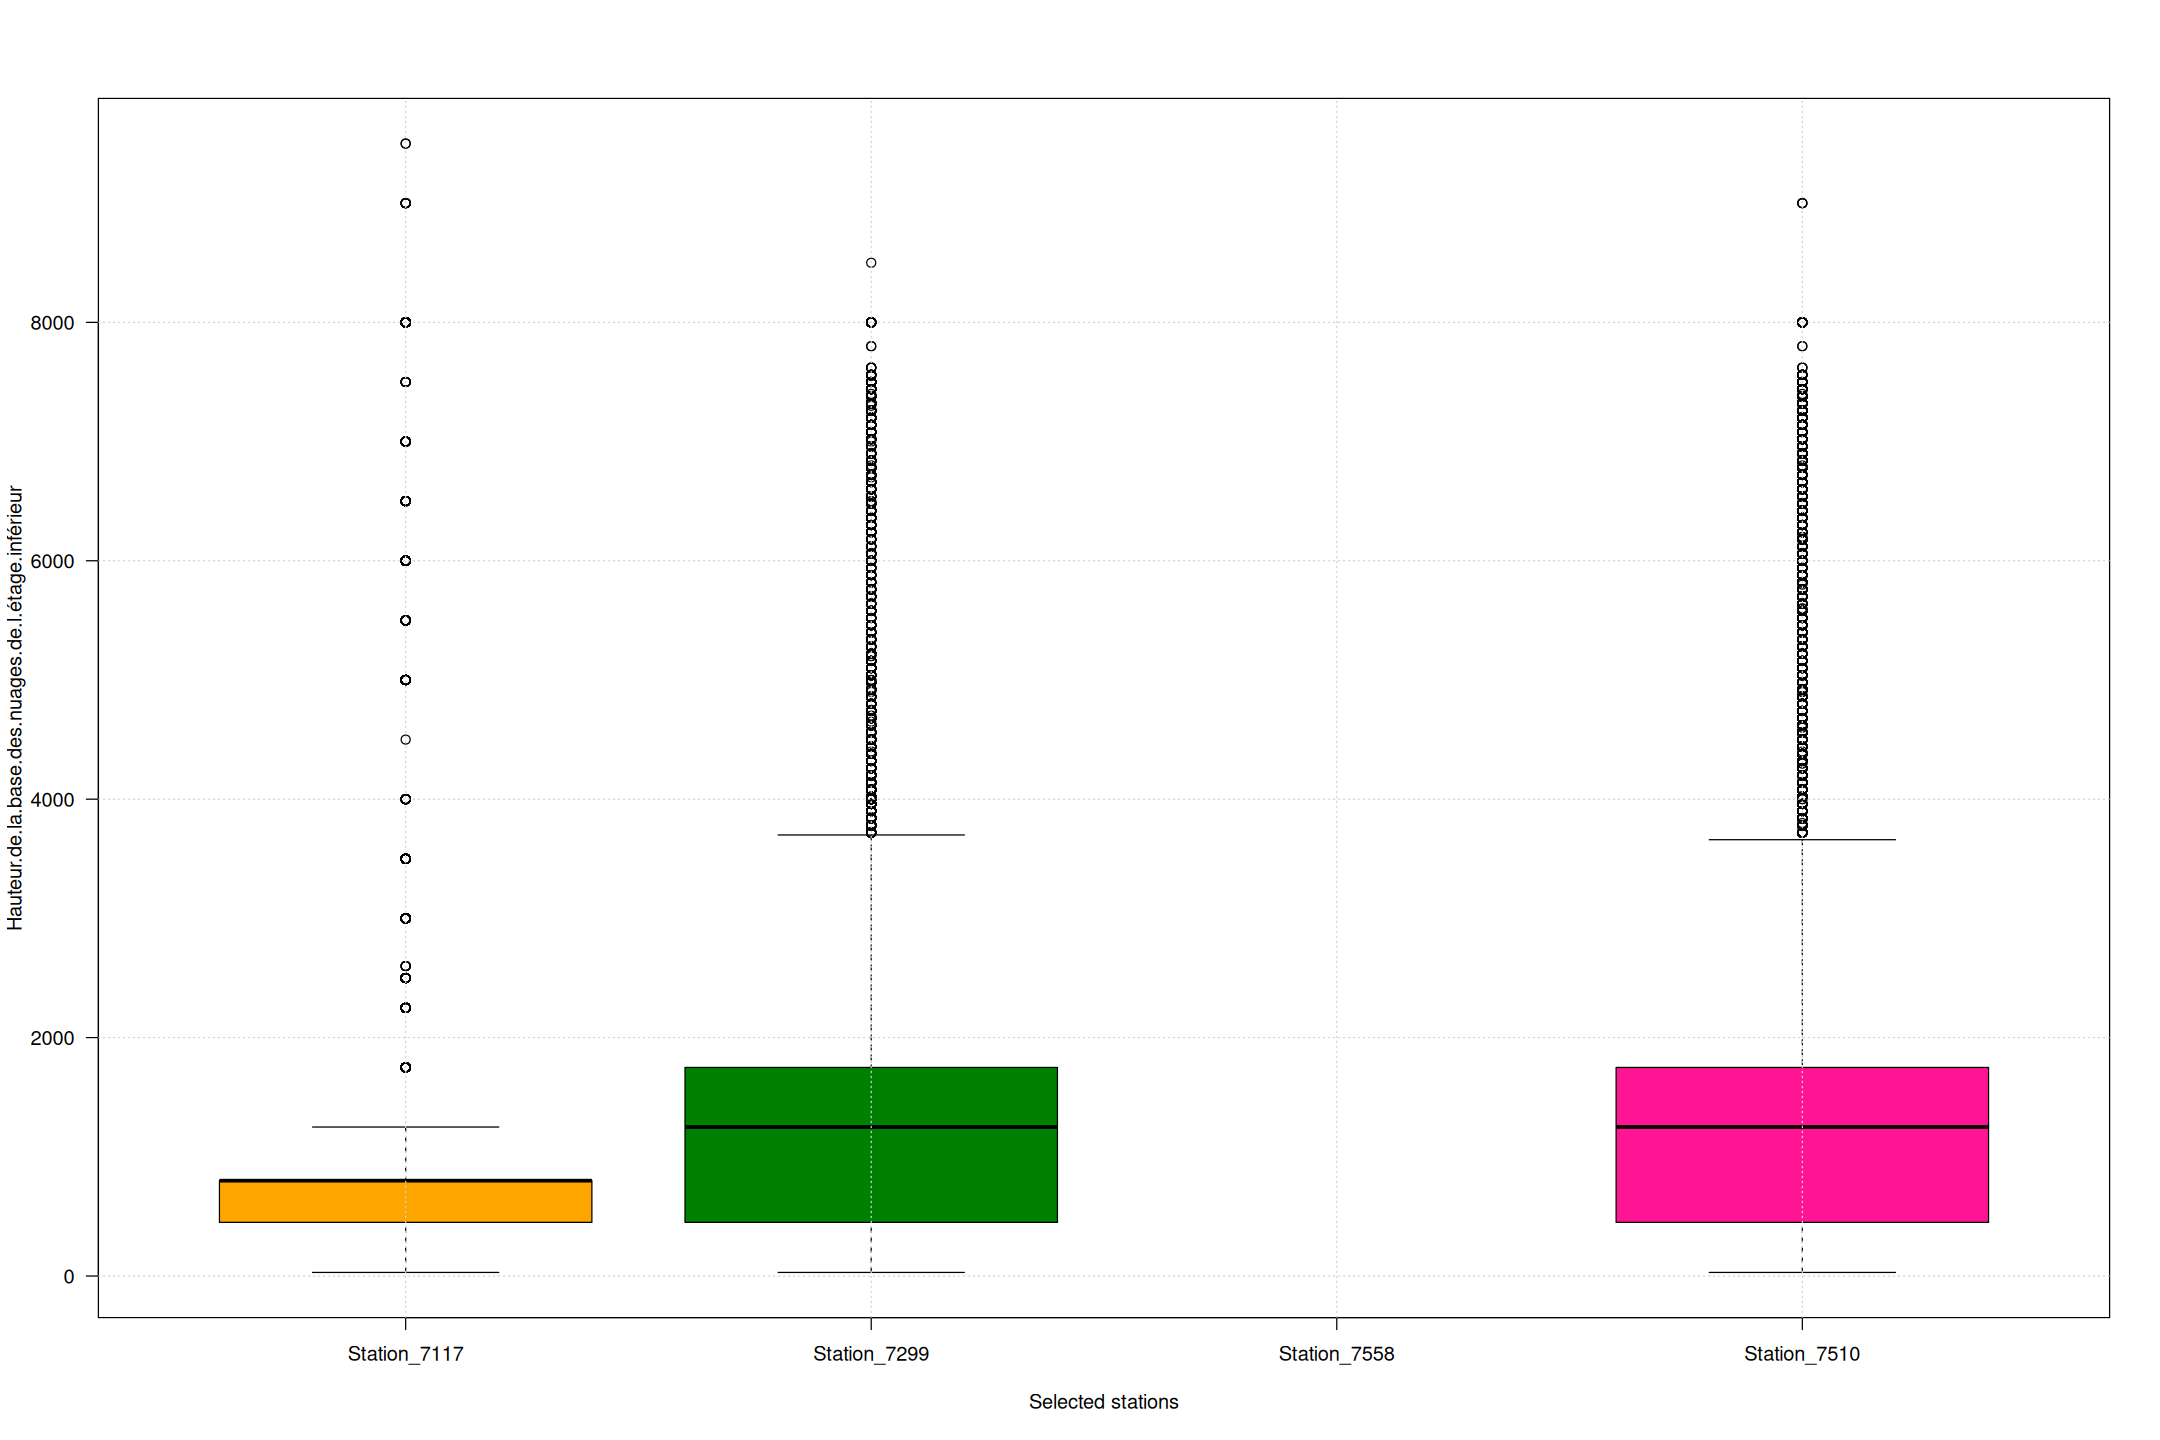

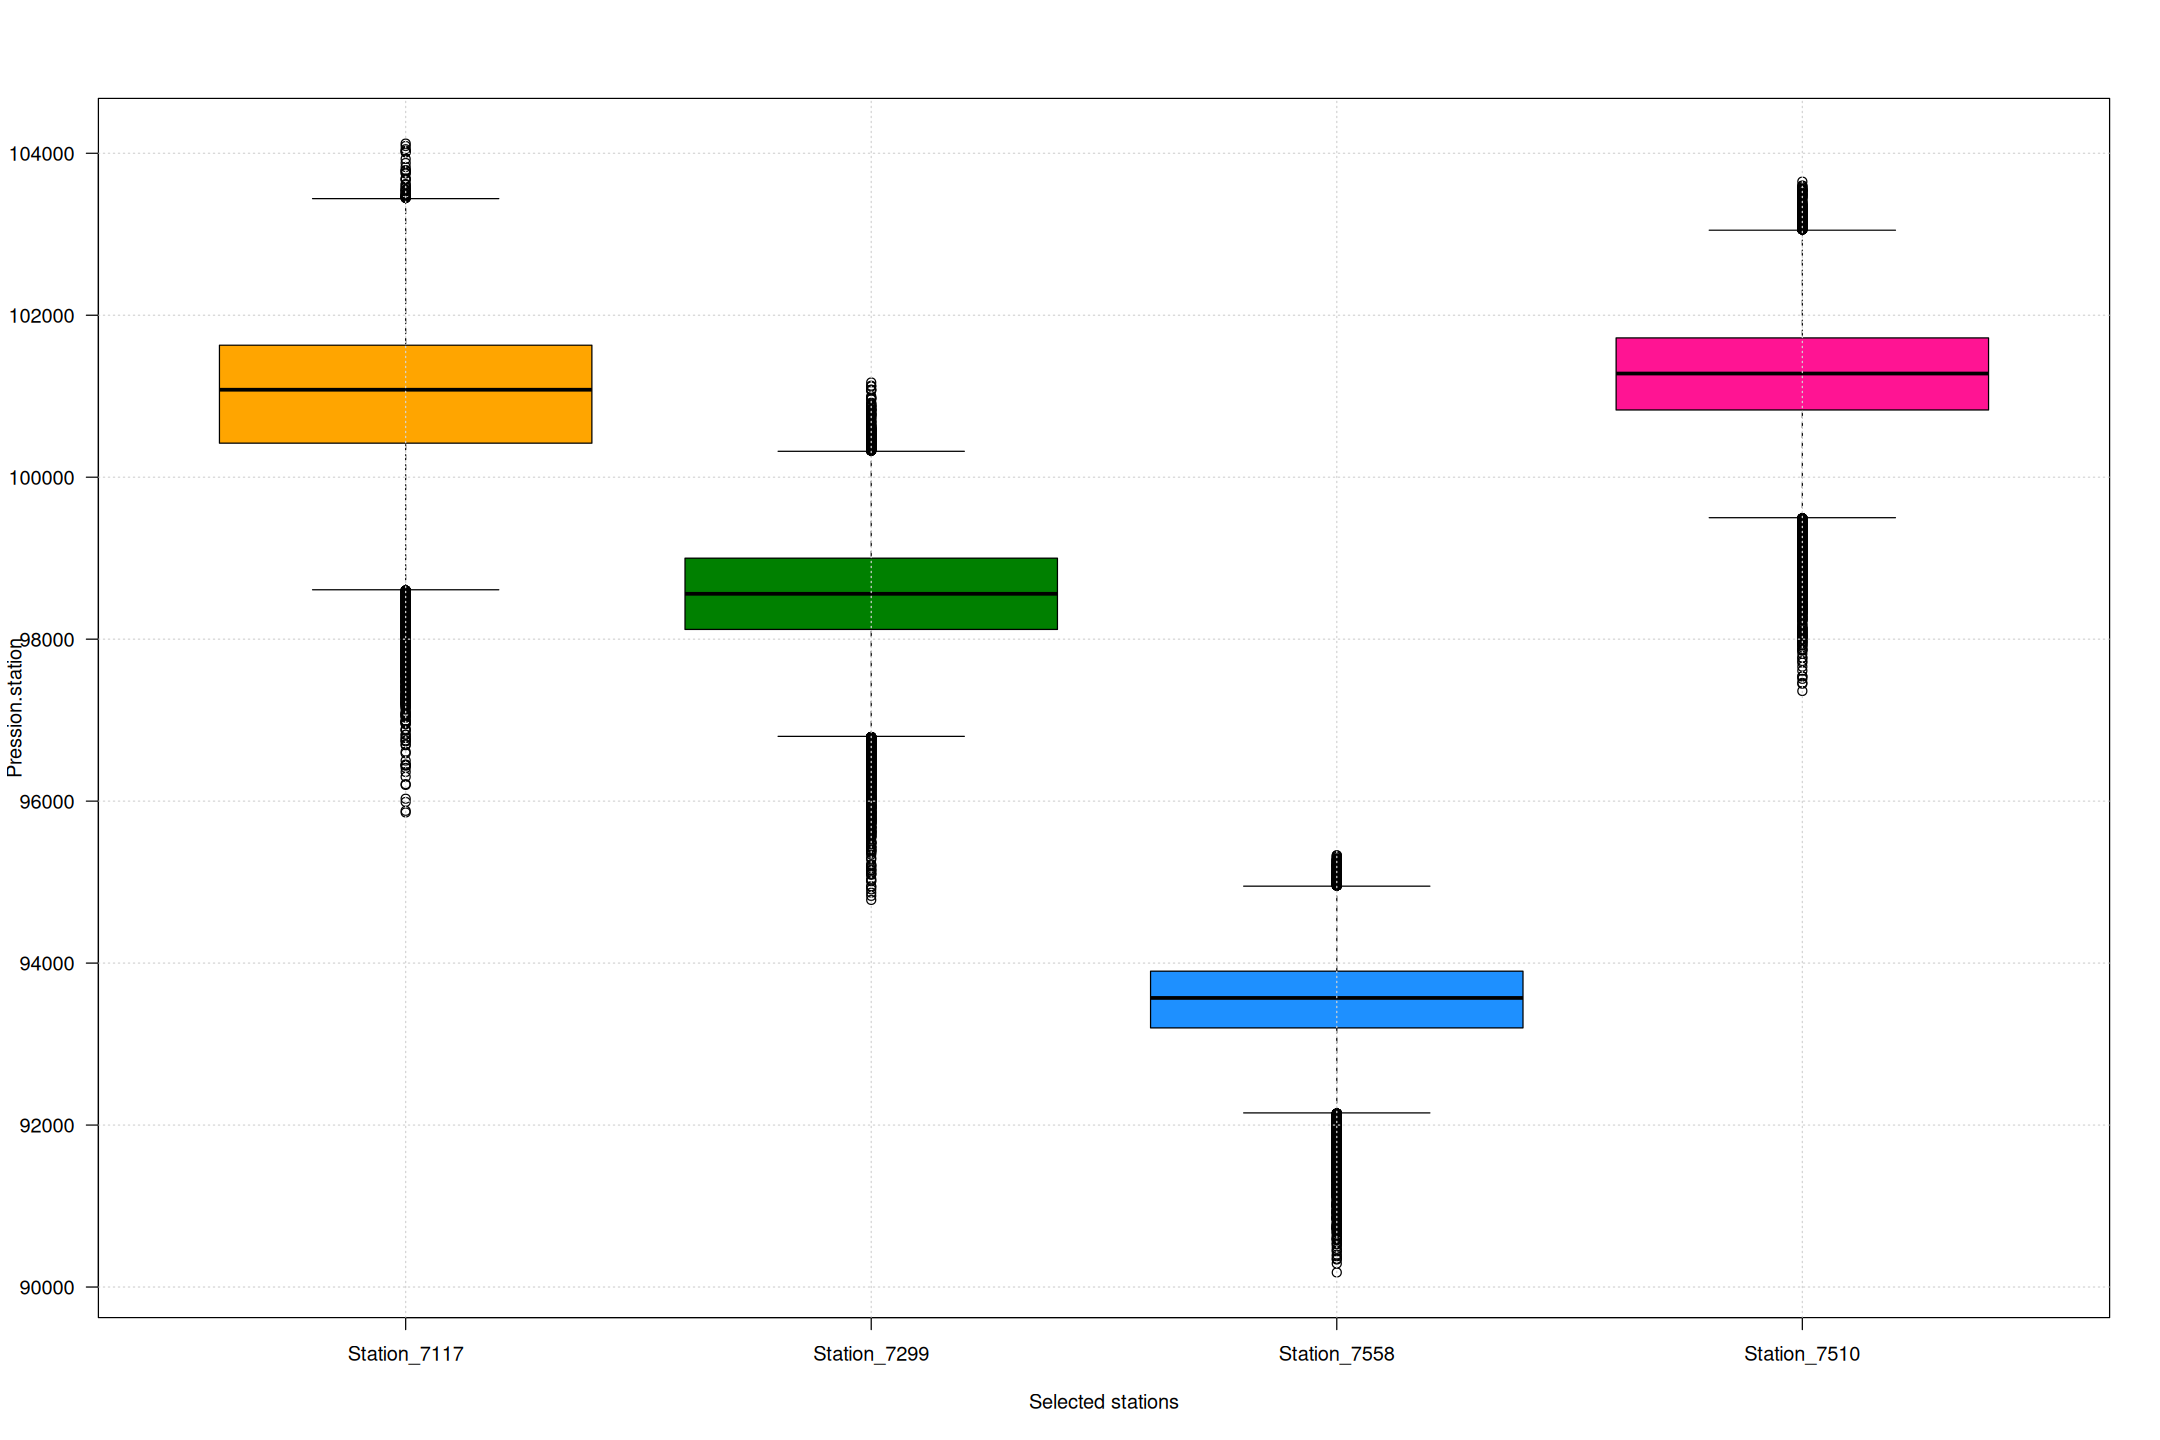

In [16]:

autoboxplot("Visibilité.horizontale", chosen_stations)
autoboxplot("Nebulosité.totale", chosen_stations)
autoboxplot("Hauteur.de.la.base.des.nuages.de.l.étage.inférieur", chosen_stations)
autoboxplot("Pression.station", chosen_stations)


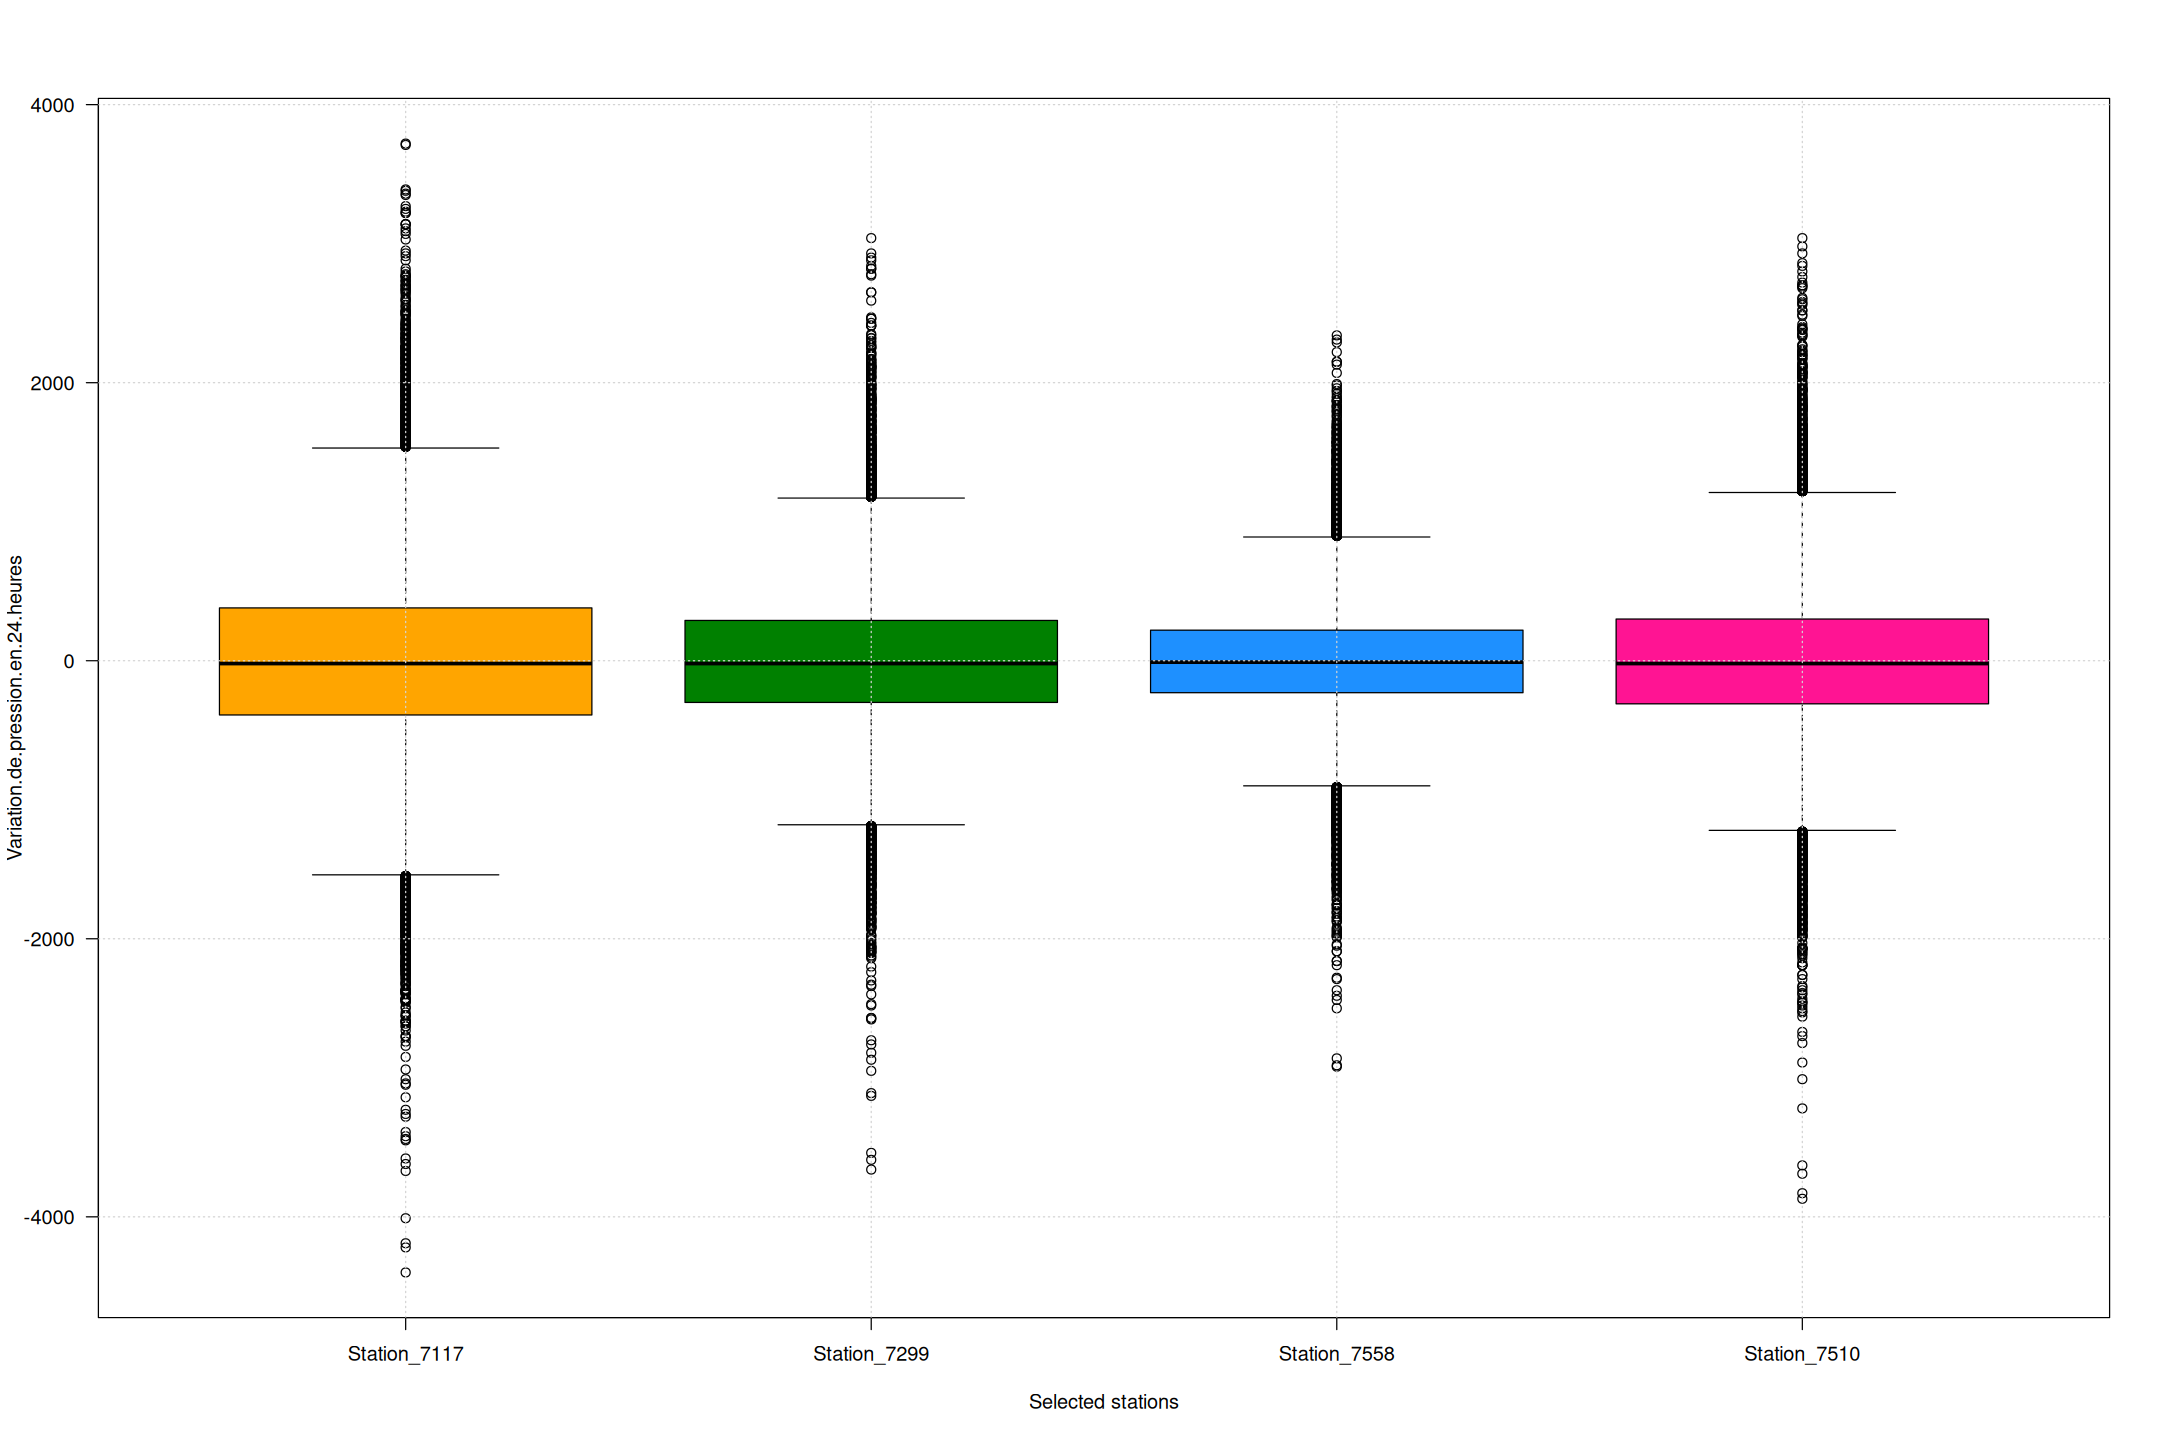

In [17]:

autoboxplot("Variation.de.pression.en.24.heures", chosen_stations)
